In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as XGB
from xgboost import XGBRegressor
import sklearn.metrics as metrics
import math
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print ('train data')
display (train.head())
print ('#'*50)
print ('test data')
display (test.head())
print ('#'*50)
display ('train shape',train.shape)
print ('#'*50)
display ('test shape',test.shape)

train data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##################################################
test data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


##################################################


'train shape'

(1460, 81)

##################################################


'test shape'

(1459, 80)

#### concat data

# EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
cat=train.select_dtypes(include='object').columns
num=train.select_dtypes(exclude='object').columns

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
train[cat].describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [ ]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    train[col].fillna('None',inplace=True)
    test[col].fillna('None',inplace=True)

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Id,0,0.000000
KitchenAbvGr,0,0.000000


In [ ]:
ha=['LotFrontage', 'MasVnrArea']
train.fillna(train[ha].mean(), inplace=True)
test.fillna(test[ha].mean(), inplace=True)

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
GarageYrBlt,81,0.055479
Id,0,0.000000
CentralAir,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000
KitchenQual,0,0.000000
KitchenAbvGr,0,0.000000


In [ ]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
GarageYrBlt,78,0.053461
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
GarageCars,1,0.000685
TotalBsmtSF,1,0.000685
BsmtUnfSF,1,0.000685
BsmtFinSF2,1,0.000685
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685
KitchenAbvGr,0,0.000000


In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageArea', 'GarageCars'):
    test[col] = test[col].fillna(0)

In [ ]:

  test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
  train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)

In [ ]:
train.isnull().sum().sum()

0

In [ ]:
test.isnull().sum().sum()

0

In [ ]:
skewness_kurtosis_results = {}
for col in train[num].columns:
    skewness = train[col].skew()
    kurtosis = train[col].kurtosis()
    skewness_kurtosis_results[col] = {'Skewness': skewness, 'Kurtosis': kurtosis}

# Mengonversi hasil menjadi DataFrame
results_df = pd.DataFrame.from_dict(skewness_kurtosis_results, orient='index')

# Menampilkan tabel
print(results_df)

                Skewness    Kurtosis
Id              0.000000   -1.200000
MSSubClass      1.407657    1.580188
LotFrontage     2.384950   21.848165
LotArea        12.207688  203.243271
OverallQual     0.216944    0.096293
OverallCond     0.693067    1.106413
YearBuilt      -0.613461   -0.439552
YearRemodAdd   -0.503562   -1.272245
MasVnrArea      2.676412   10.154316
BsmtFinSF1      1.685503   11.118236
BsmtFinSF2      4.255261   20.113338
BsmtUnfSF       0.920268    0.474994
TotalBsmtSF     1.524255   13.250483
1stFlrSF        1.376757    5.745841
2ndFlrSF        0.813030   -0.553464
LowQualFinSF    9.011341   83.234817
GrLivArea       1.366560    4.895121
BsmtFullBath    0.596067   -0.839098
BsmtHalfBath    4.103403   16.396642
FullBath        0.036562   -0.857043
HalfBath        0.675897   -1.076927
BedroomAbvGr    0.211790    2.230875
KitchenAbvGr    4.488397   21.532404
TotRmsAbvGrd    0.676341    0.880762
Fireplaces      0.649565   -0.217237
GarageYrBlt    -3.869501   13.043226
G

kolom yang memiliki skewness dan kurtosis akan di normalkan menggunakan yeo-jhonshon

#### numerical data

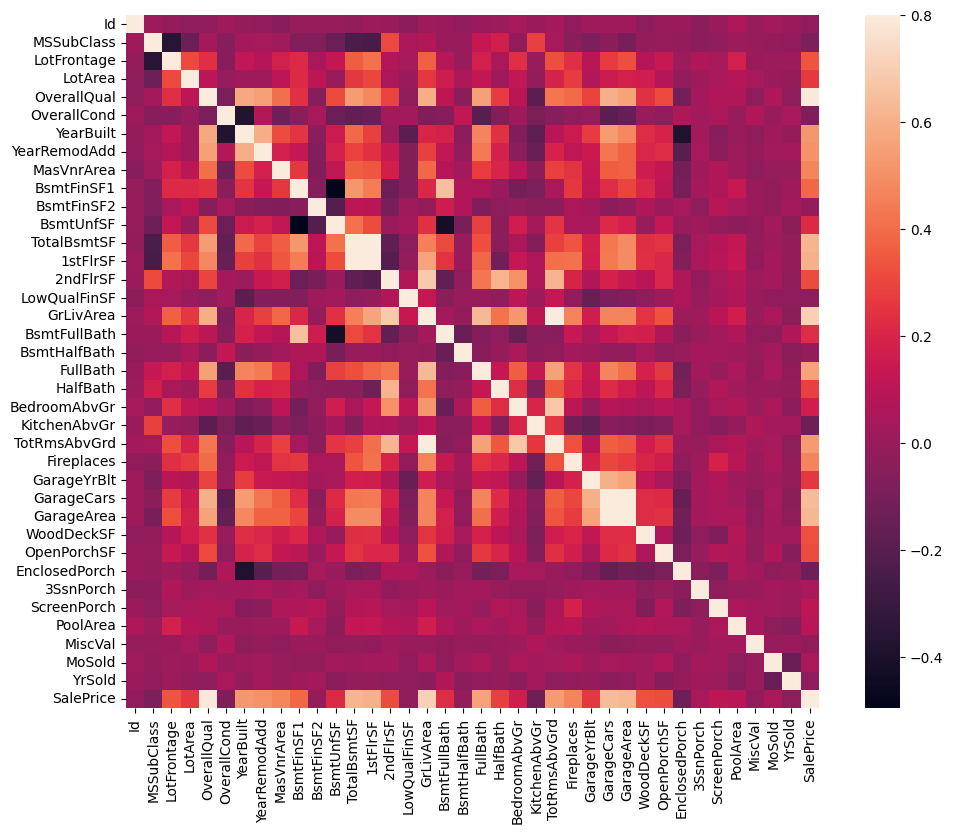

In [ ]:
corrmat = train[num].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

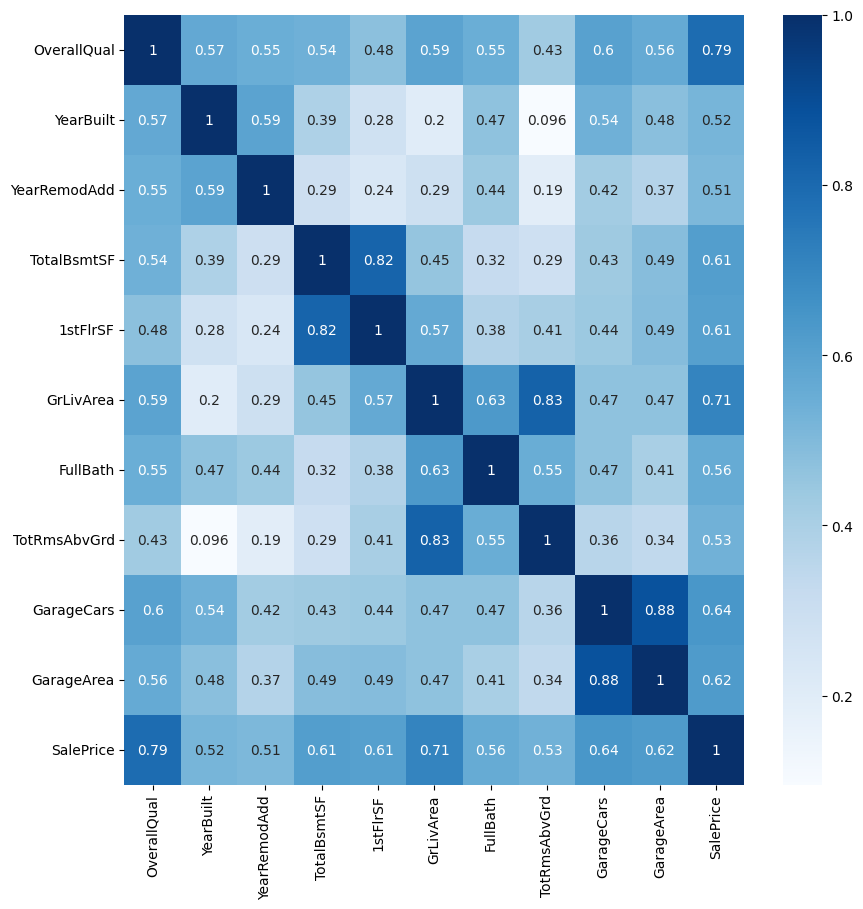

In [ ]:
corr = train[num].corr()
important_num_cols = list(train[num].corr()["SalePrice"][(train[num].corr()["SalePrice"]>0.50) | (train[num].corr()["SalePrice"]<-0.50)].index)
plt.figure(figsize=(10,10))
g = sns.heatmap(train[important_num_cols].corr(),annot=True,cmap="Blues")

In [ ]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

features that have high corelation woth target is
1. OverallQual      0.790982
2. GrLivArea        0.708624
3. GarageCars       0.640409
4. GarageArea       0.623431
5. TotalBsmtSF      0.613581
6. 1stFlrSF         0.605852
7. FullBath         0.560664
8. TotRmsAbvGrd     0.533723
9. YearBuilt        0.522897
10. YearRemodAdd     0.507101

but there are feature that have multicolinearity with others. there are is:
1. TotalBsmtSF and 1stFlrSF
2. GrLivArea and TotRmsAbvGrd
3. GarageCars and GarageArea


so i decide to drop one of them, looking by corelation with target

#### categorical data

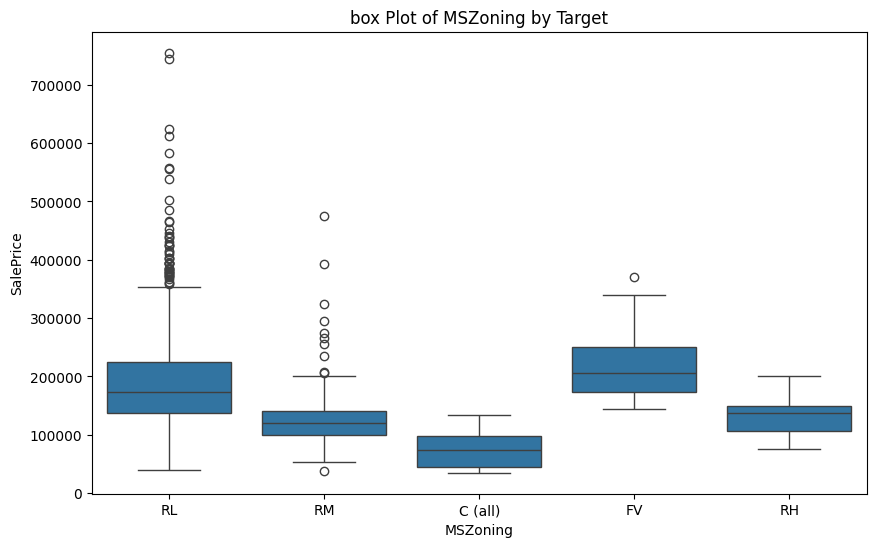

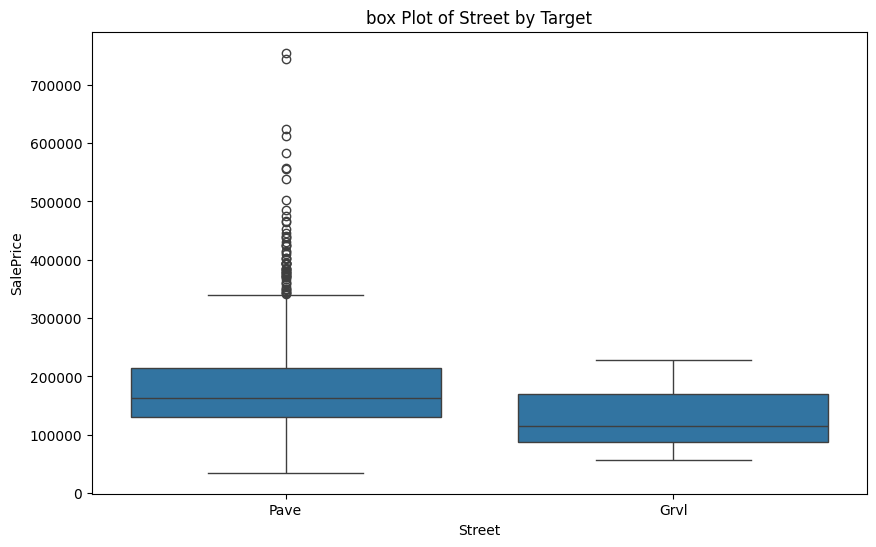

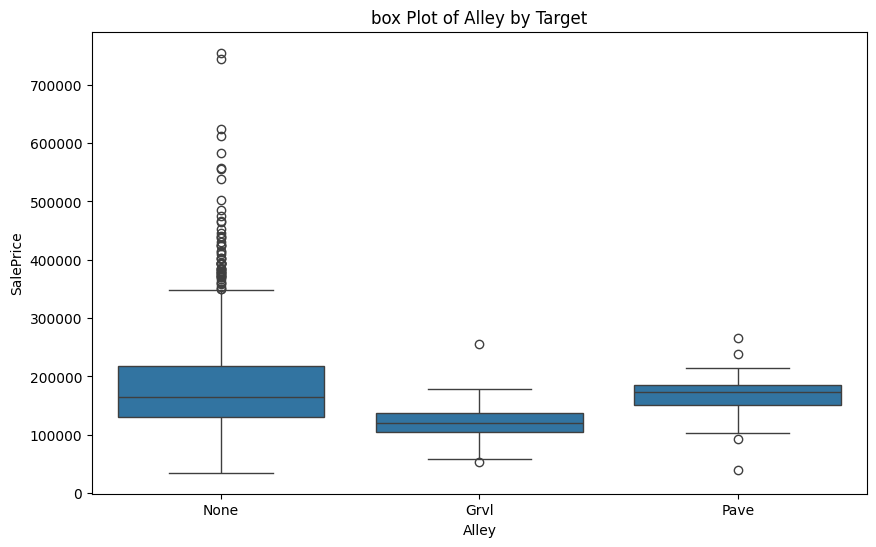

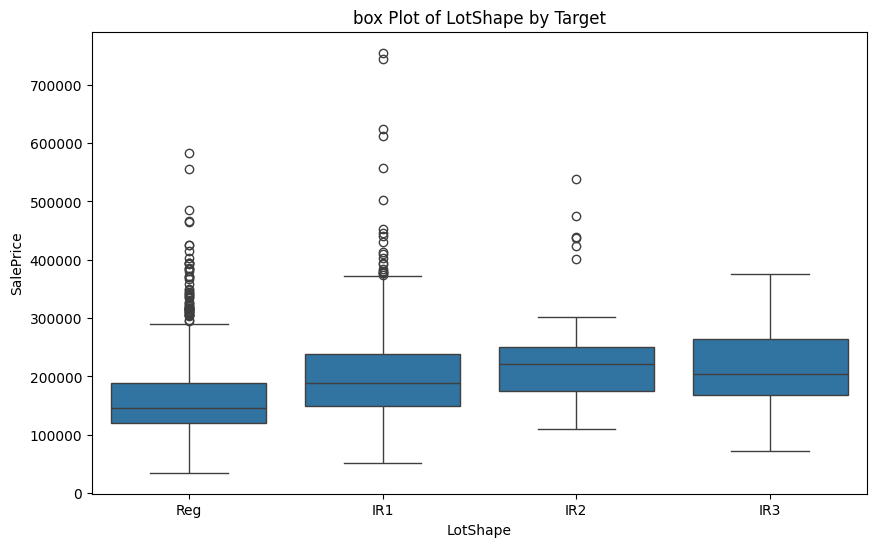

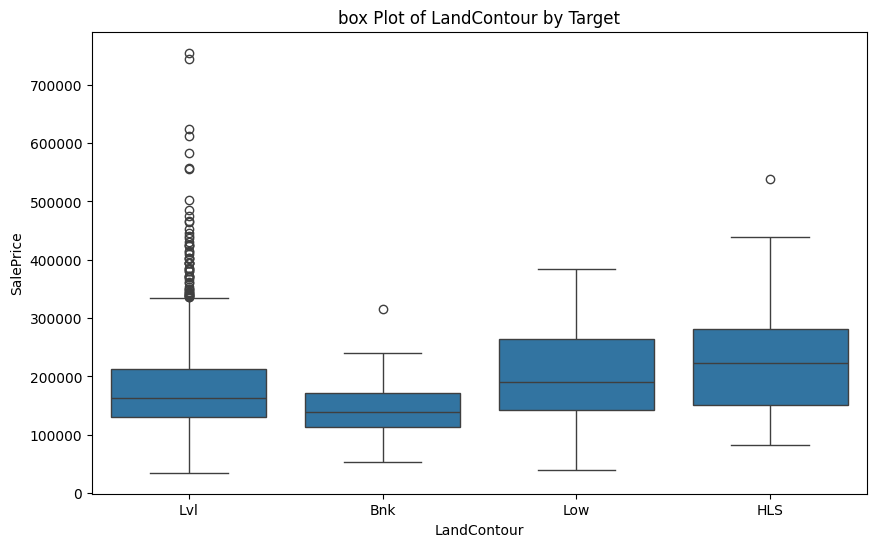

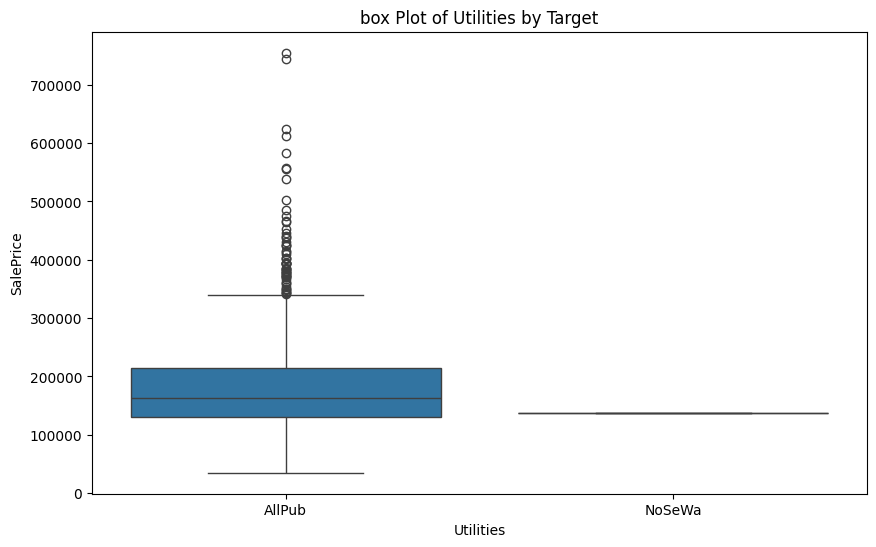

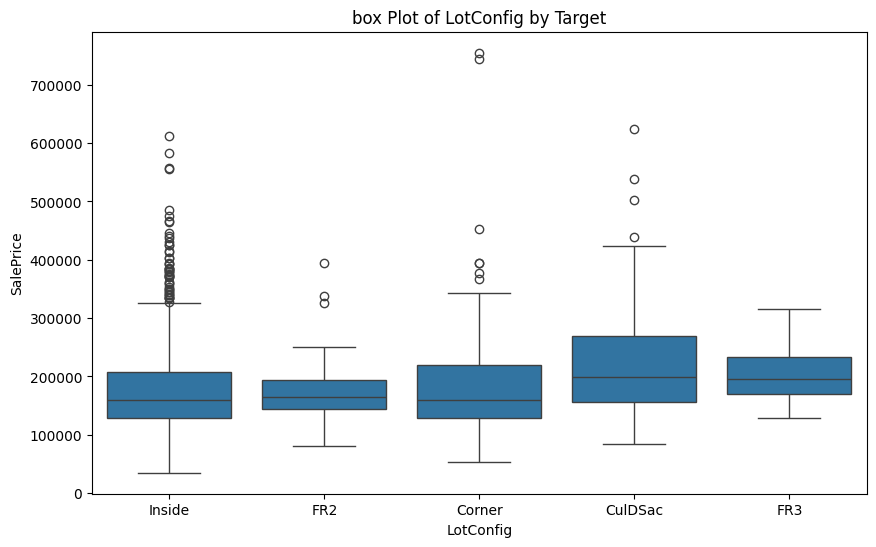

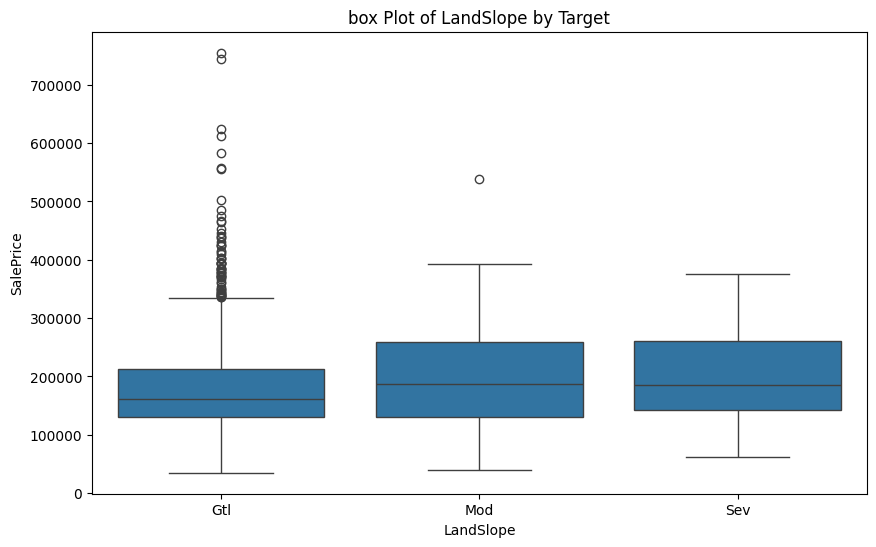

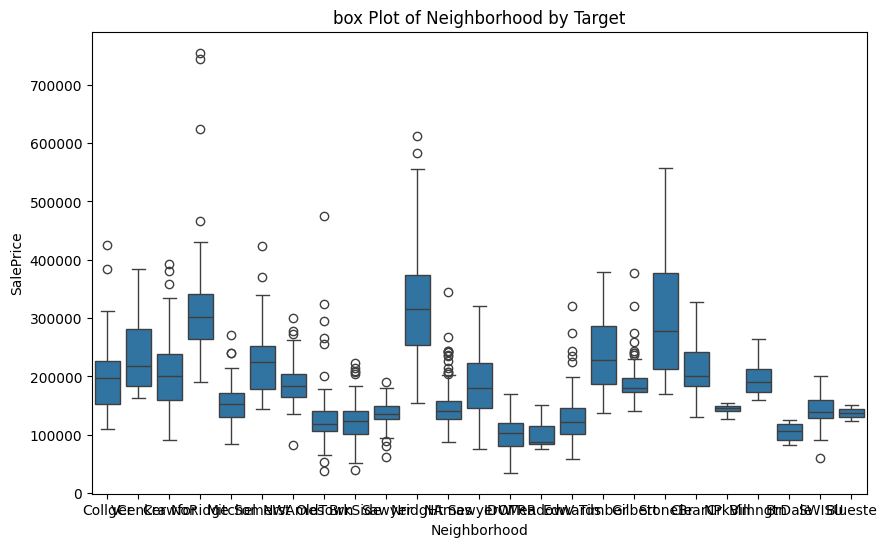

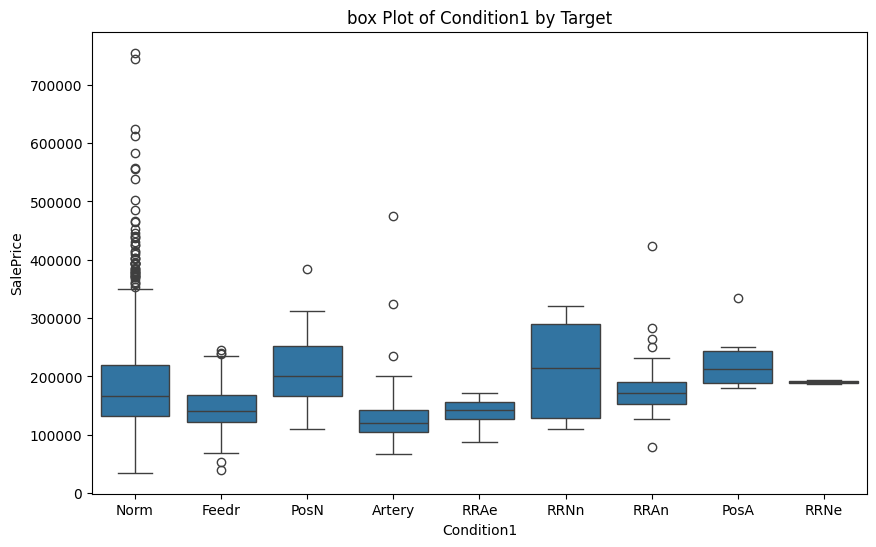

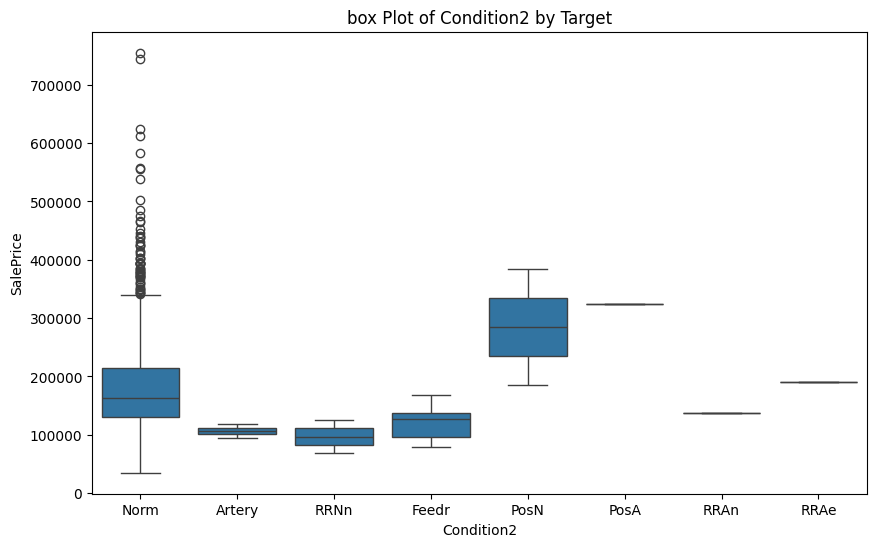

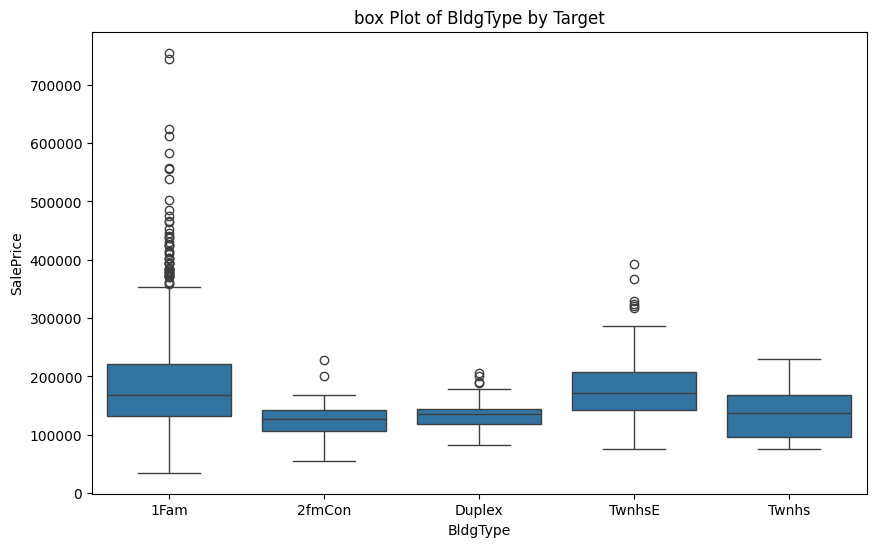

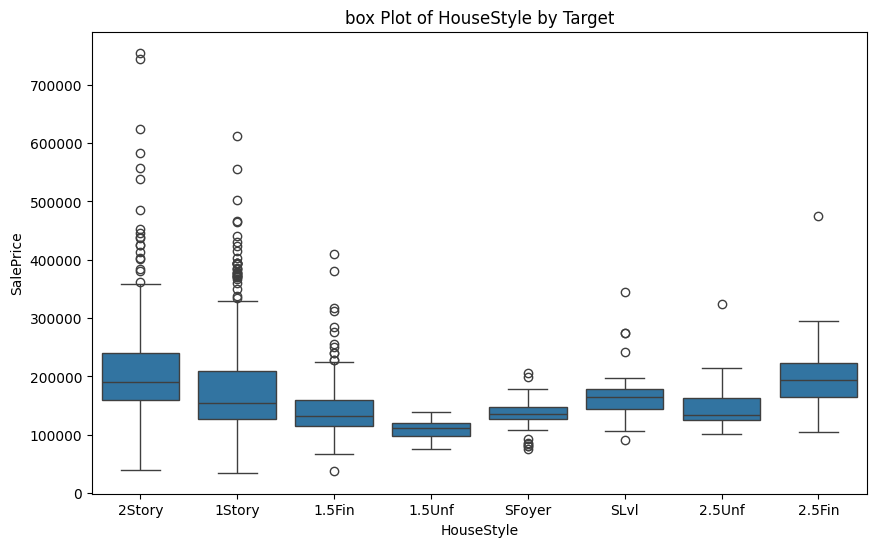

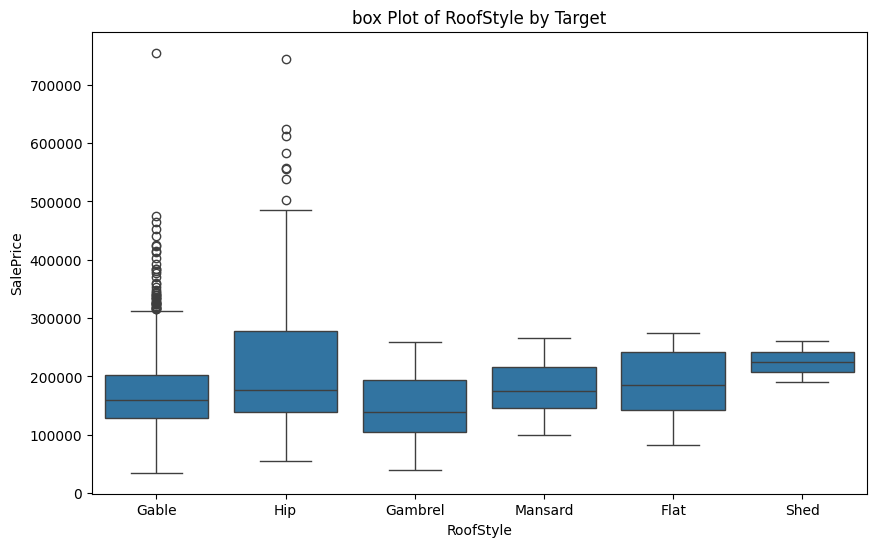

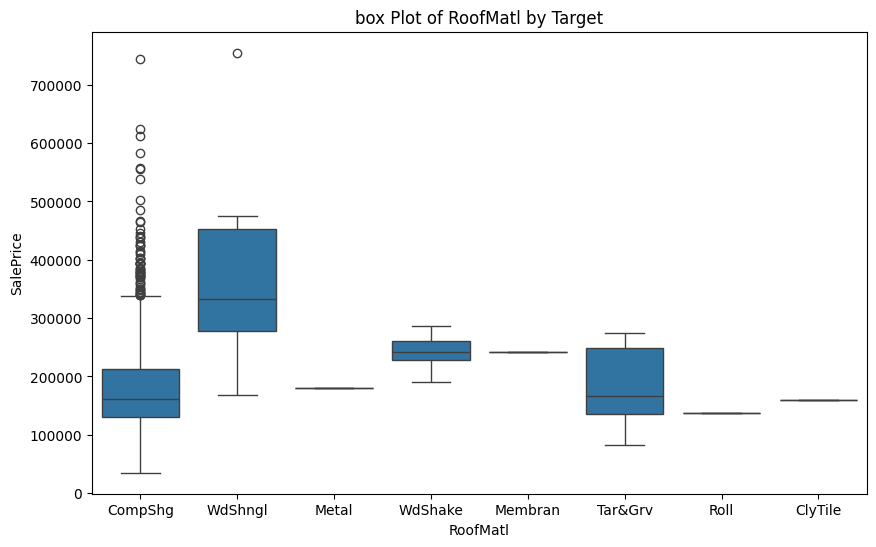

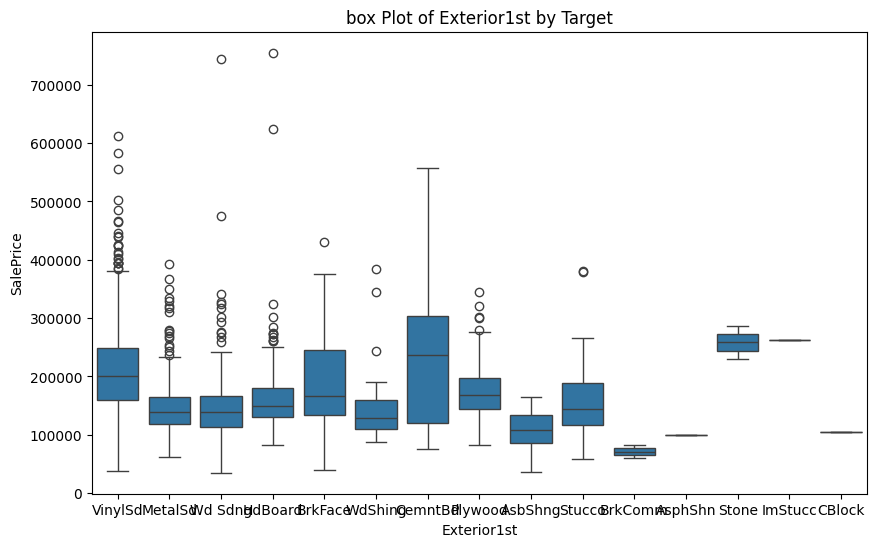

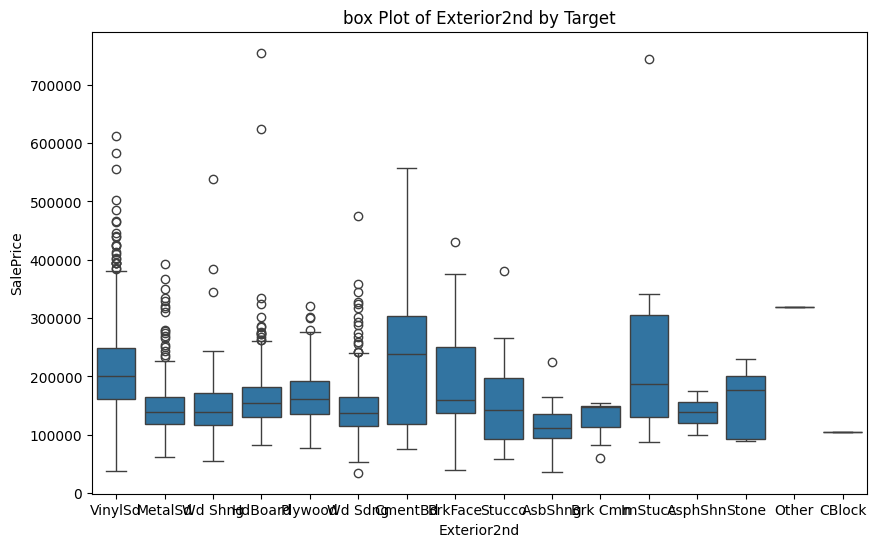

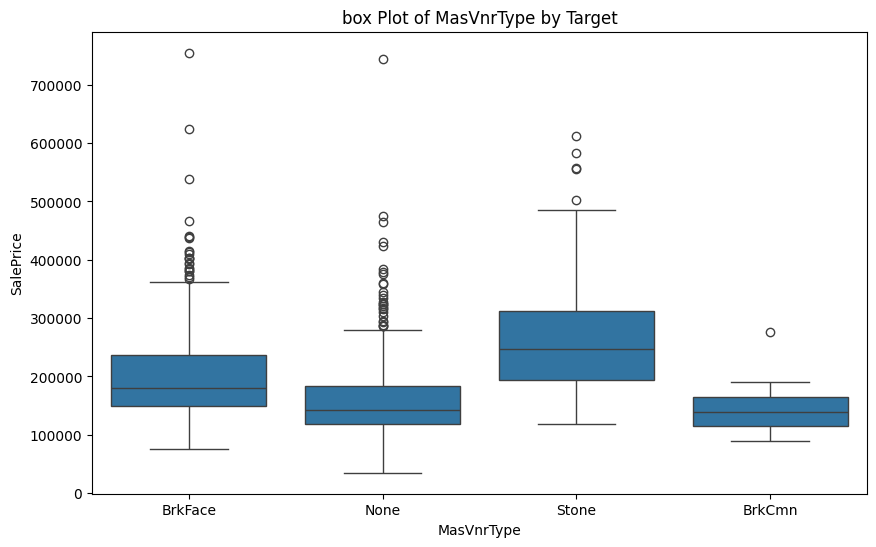

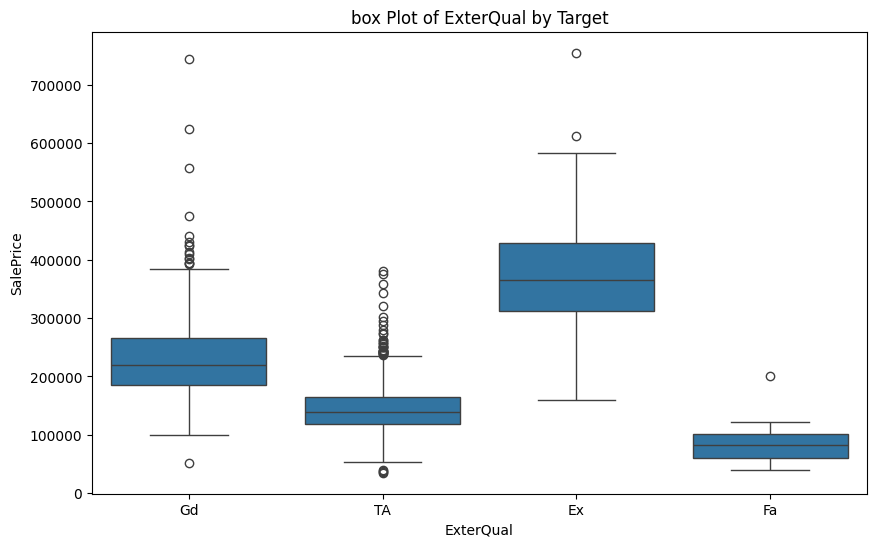

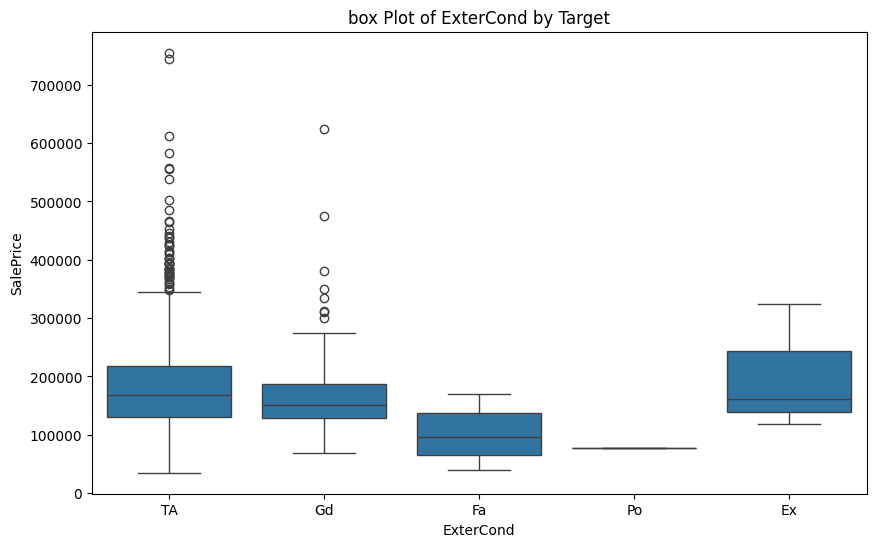

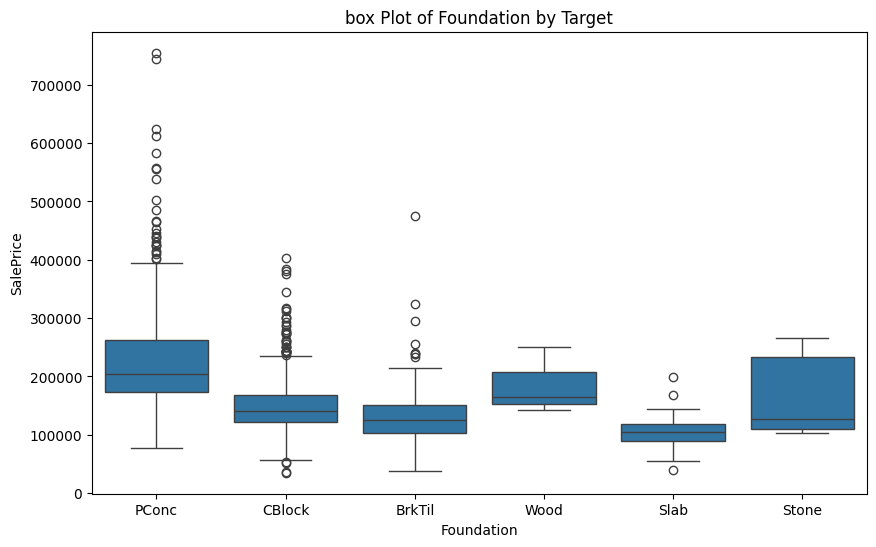

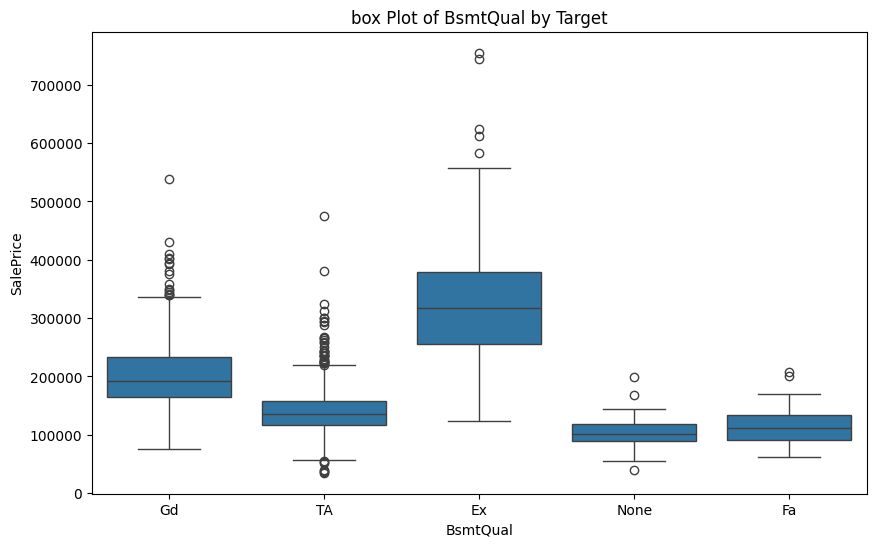

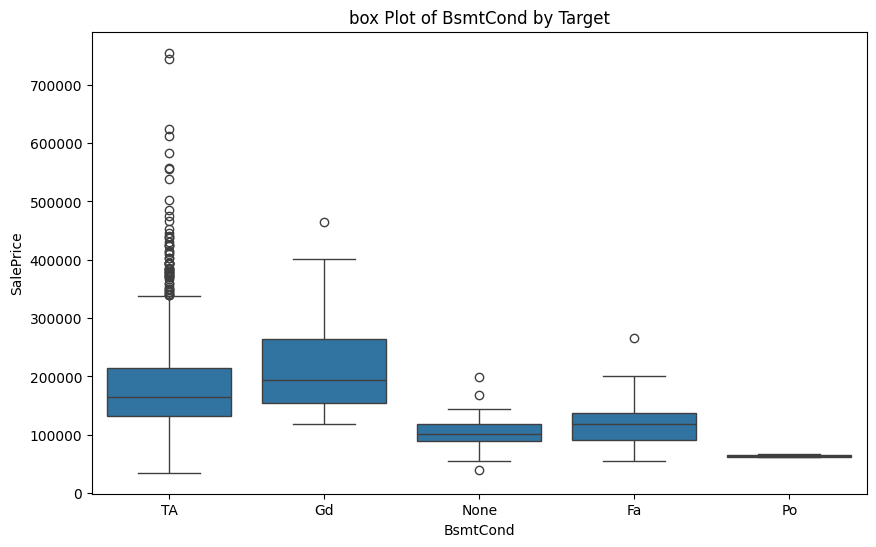

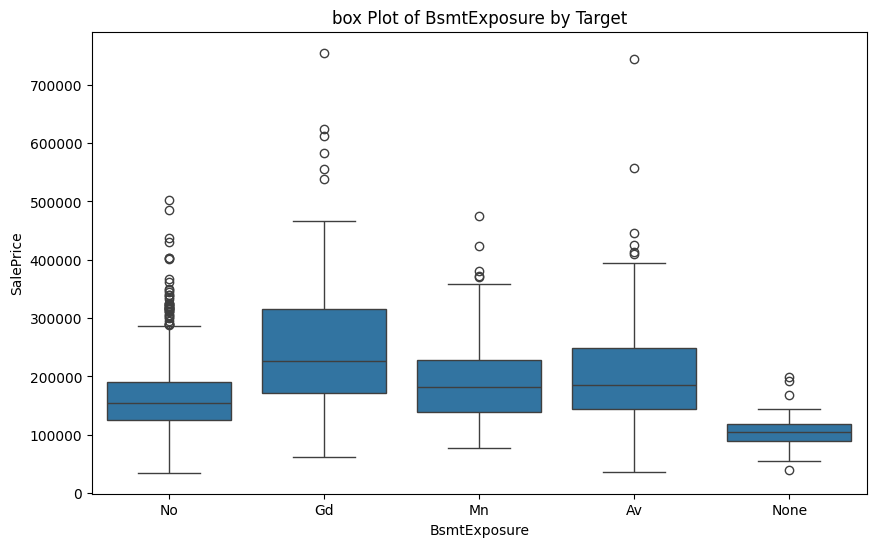

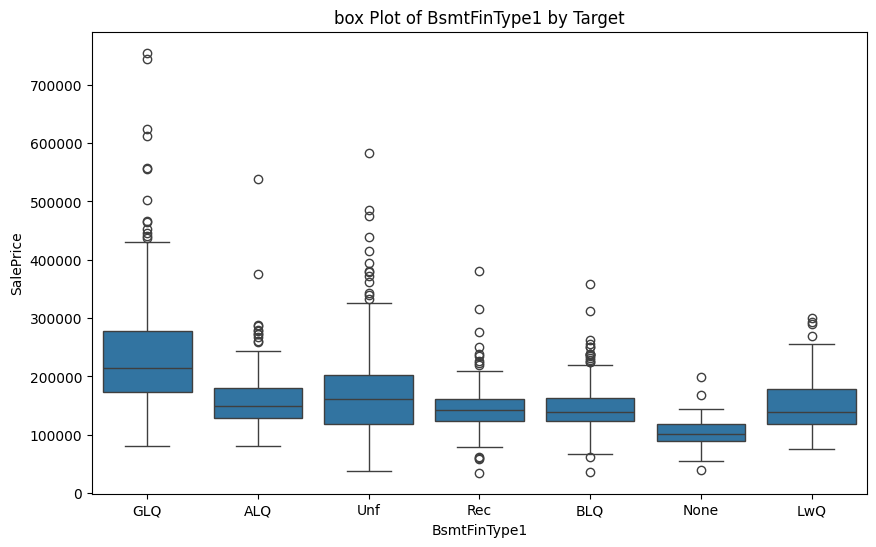

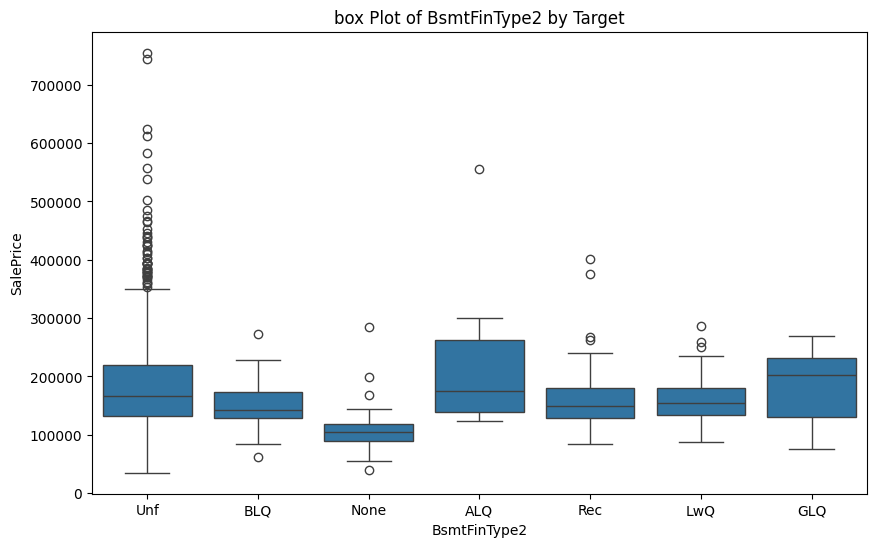

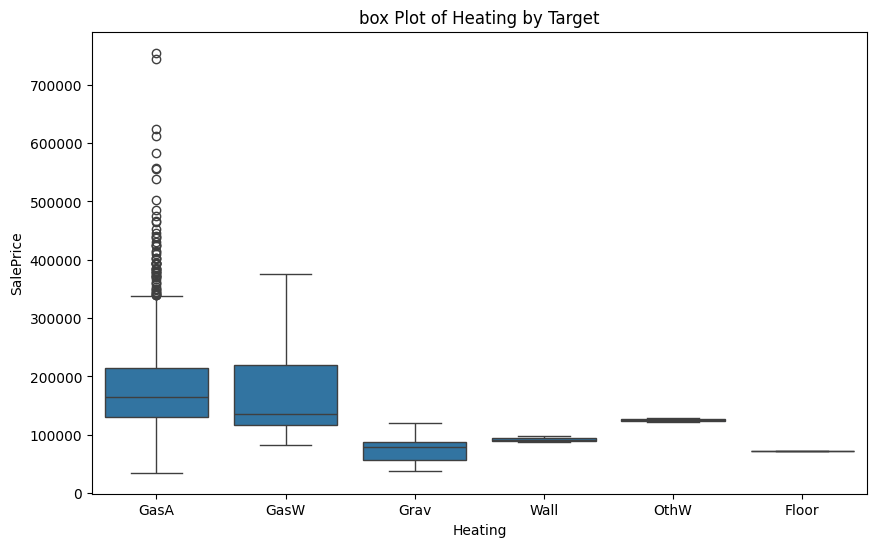

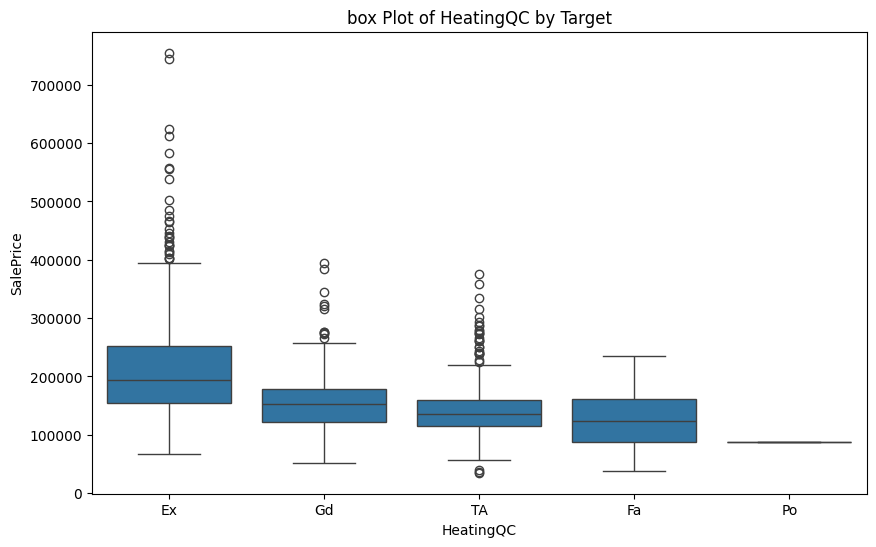

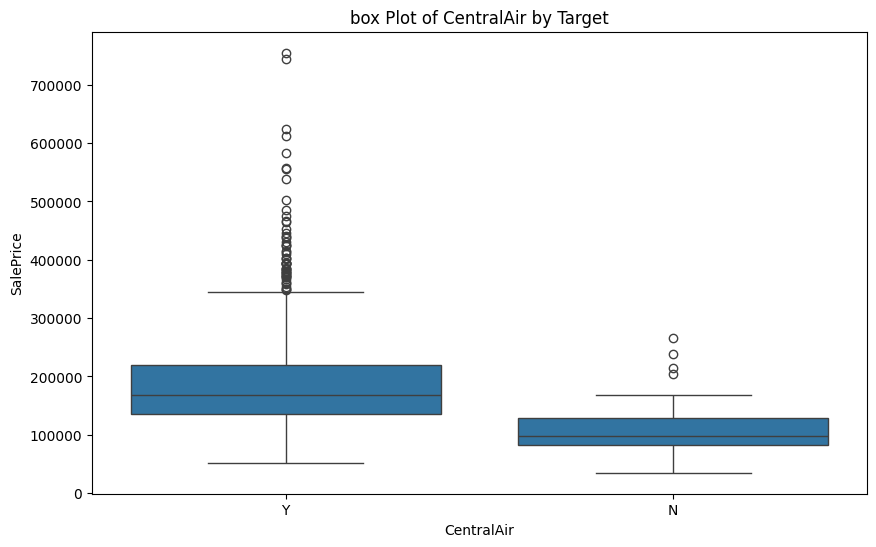

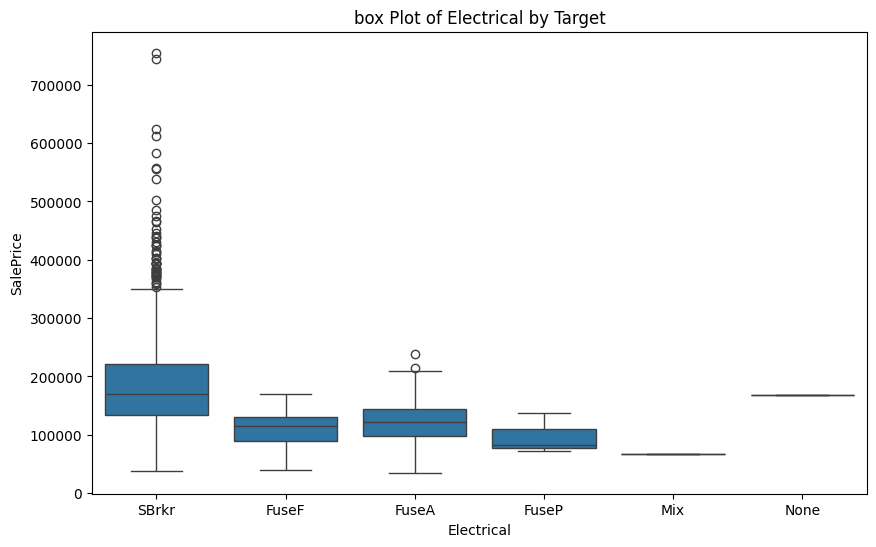

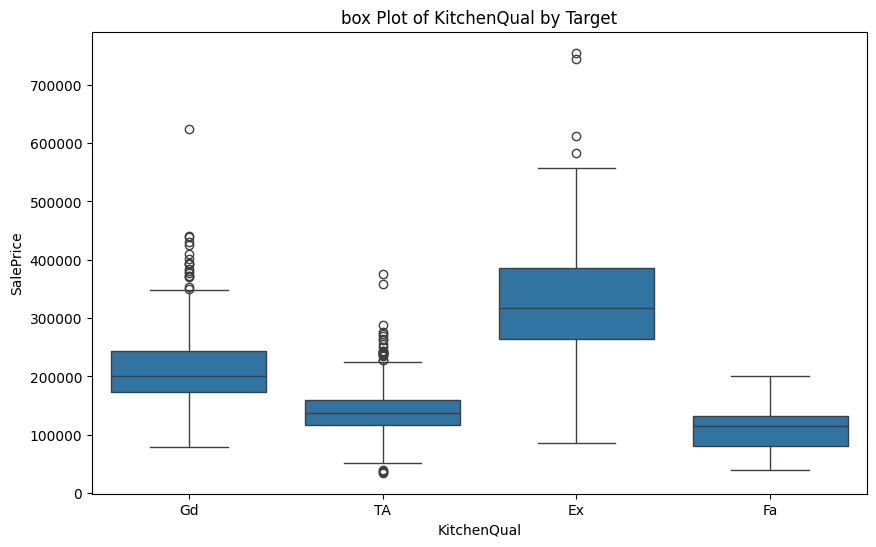

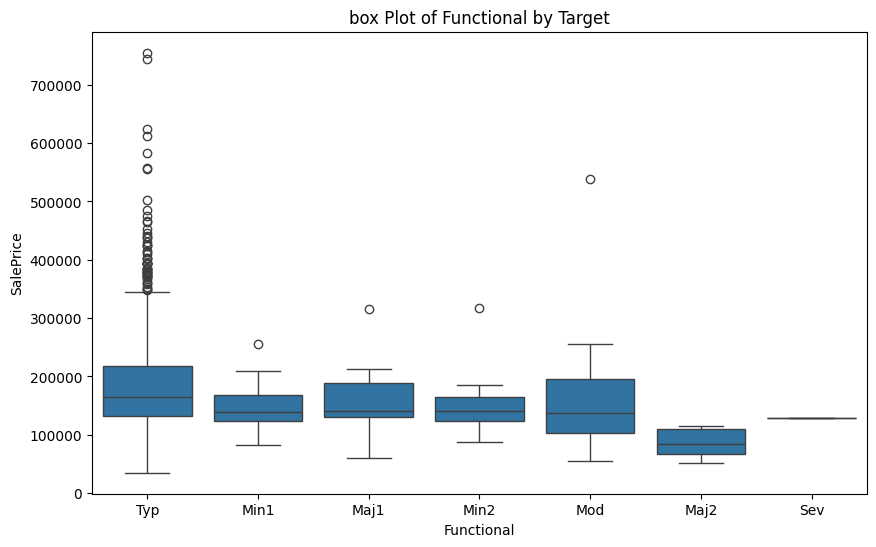

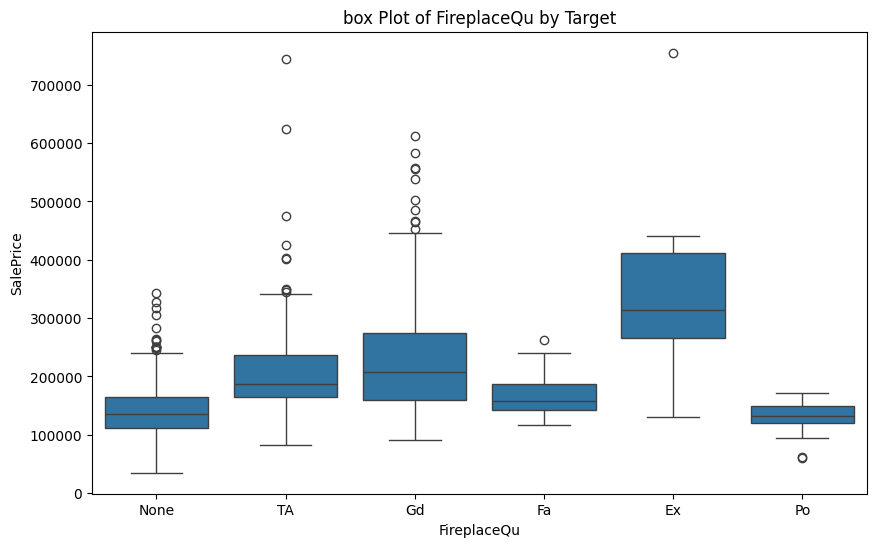

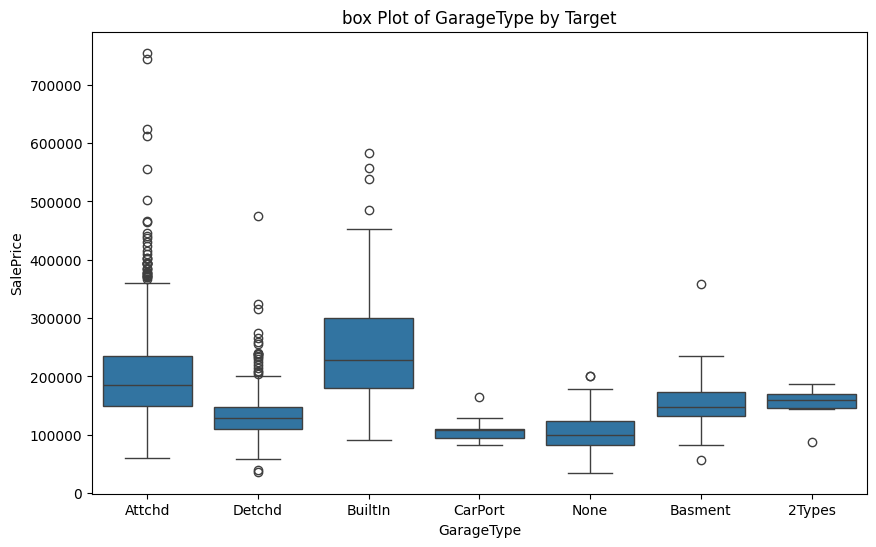

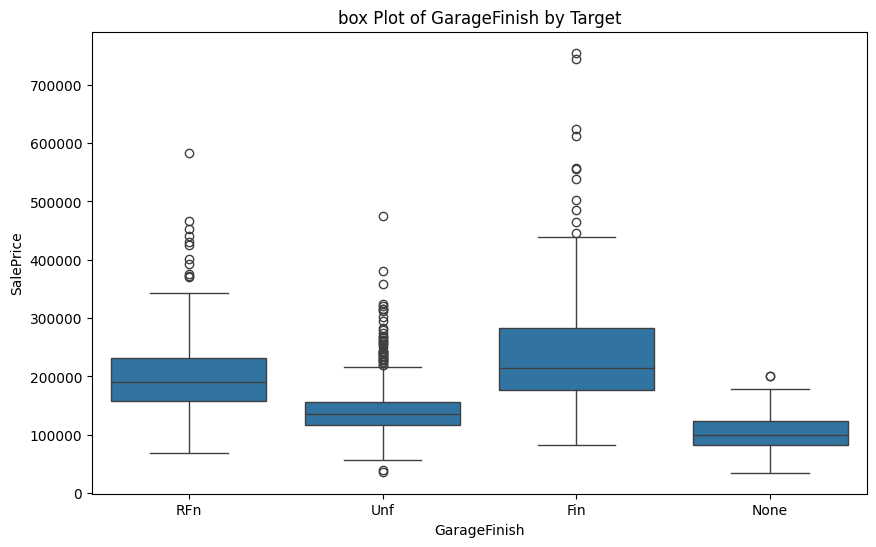

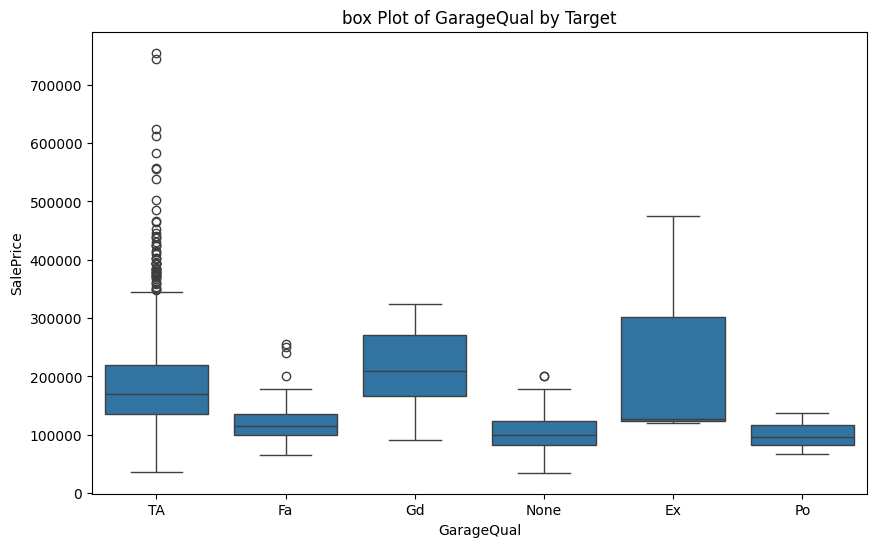

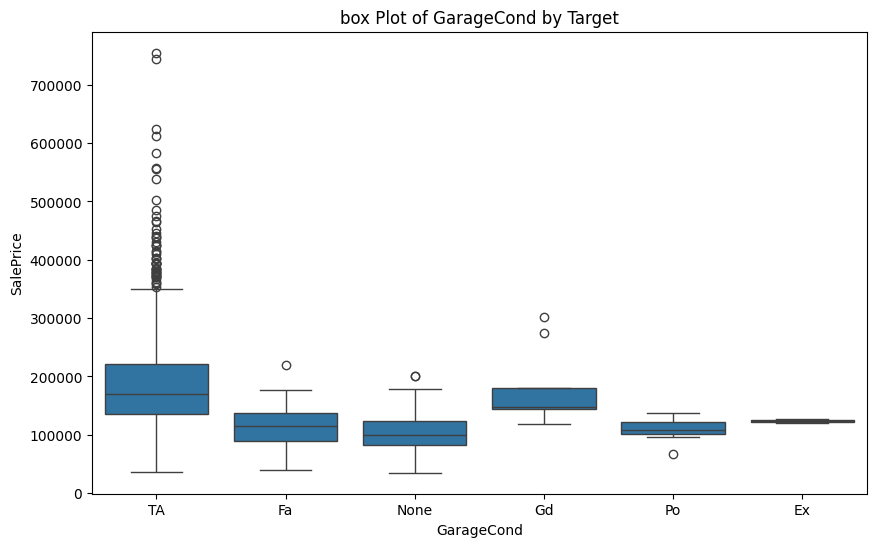

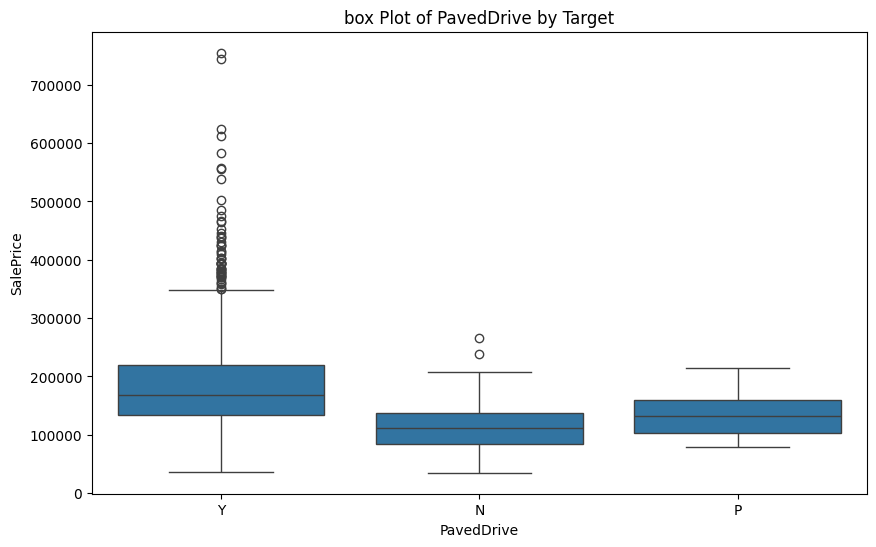

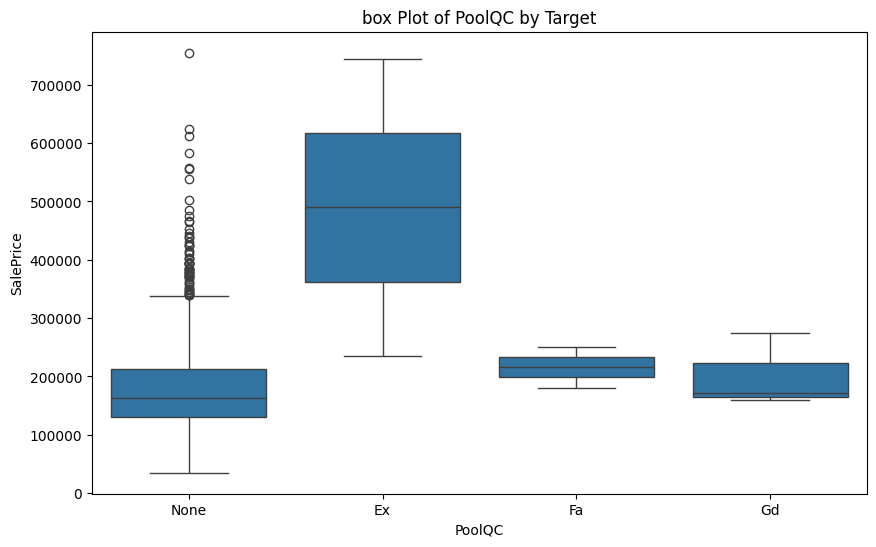

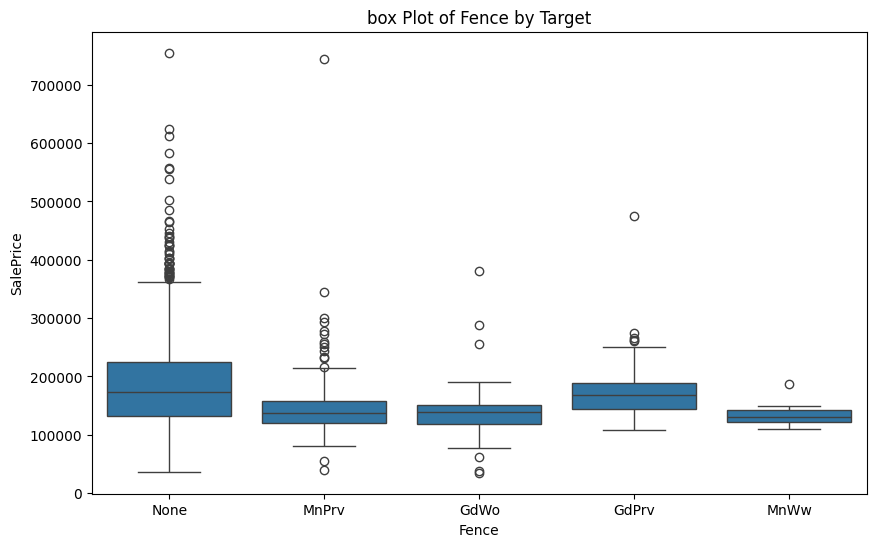

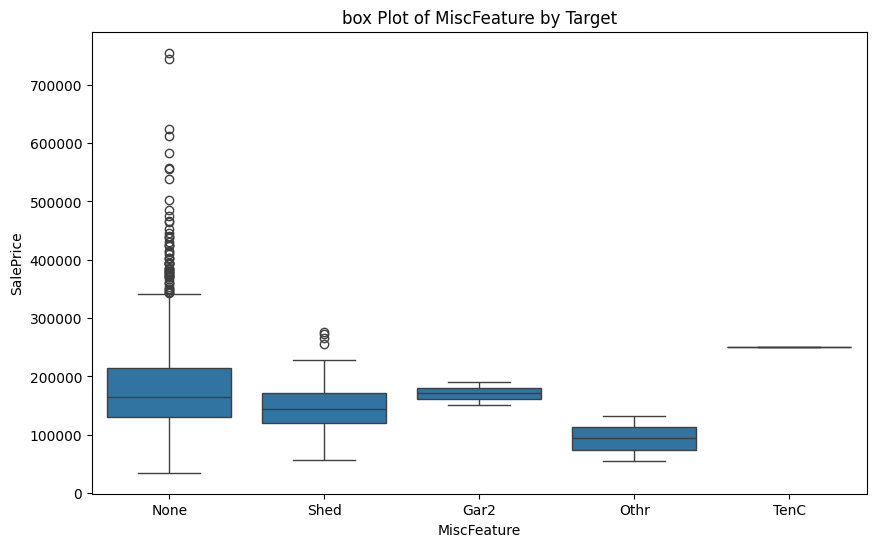

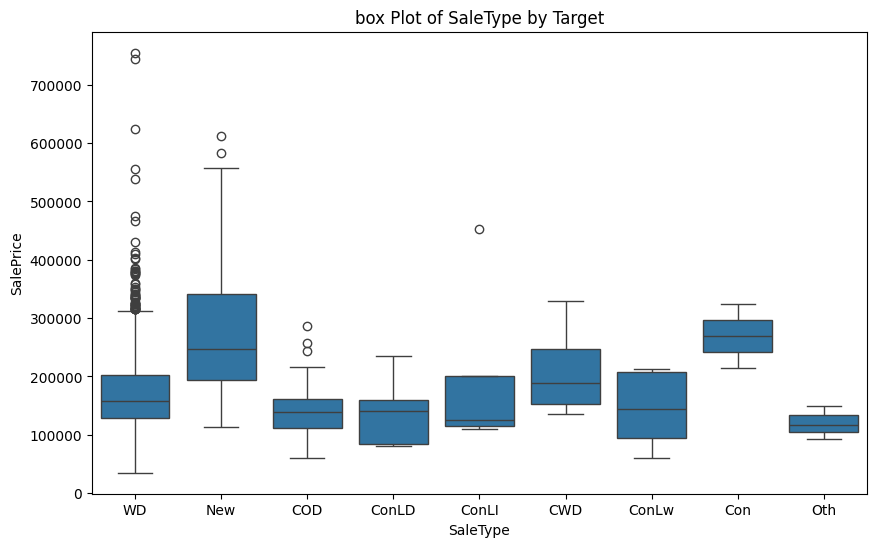

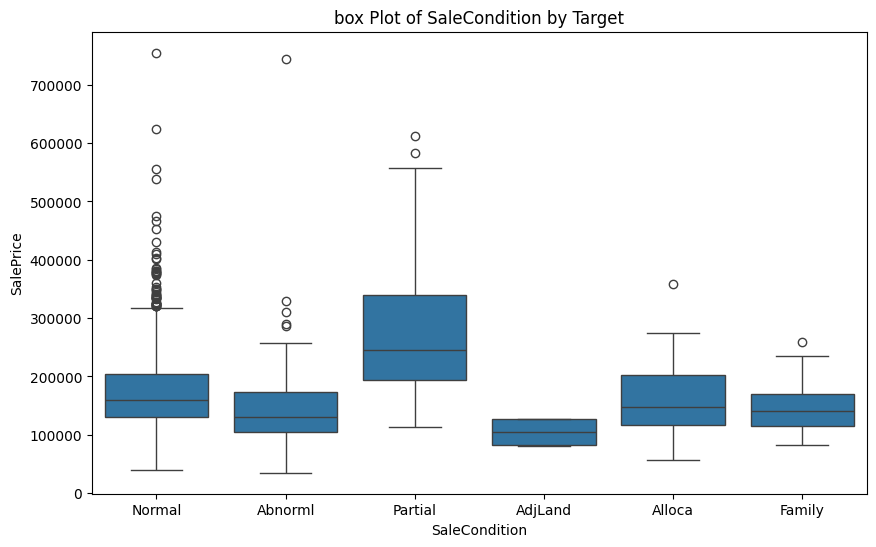

In [ ]:
for column in cat:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='SalePrice', data=train)
    plt.title(f'box Plot of {column} by Target')
    plt.show()

Conclusion from EDA on categorical columns:

For many of the categorical there is no strong relation to the target.
However, for some fetaures it is easy to find a strong relation.
From the figures above these are : 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType' Also for the categorical features, I use only those that show a strong relation to SalePrice.


So the other columns are dropped when creating the ML dataframes in Part 2 :
'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition'


source : https://www.kaggle.com/code/dejavu23/house-prices-eda-to-ml-beginner

# data pre-processing

### outliers

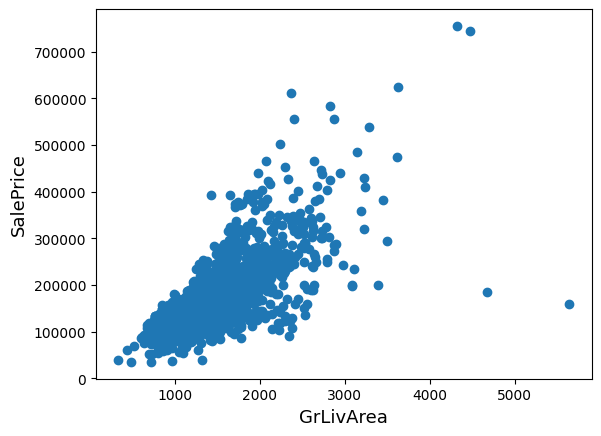

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

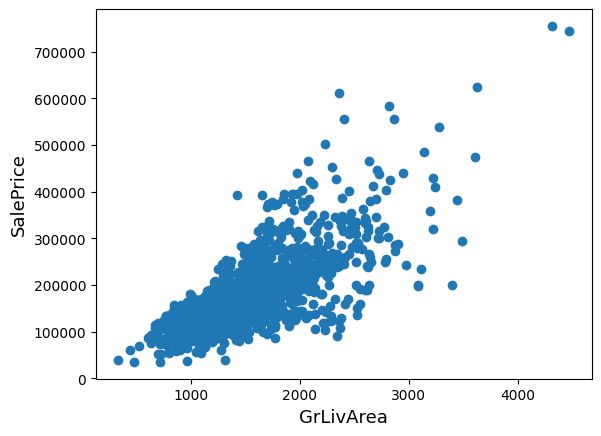

In [ ]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [ ]:
id_test =test['Id']

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          1458 non-null   object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallCond  

In [ ]:
train['Age']=train['YrSold']-train['YearBuilt']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          1458 non-null   object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallCond  

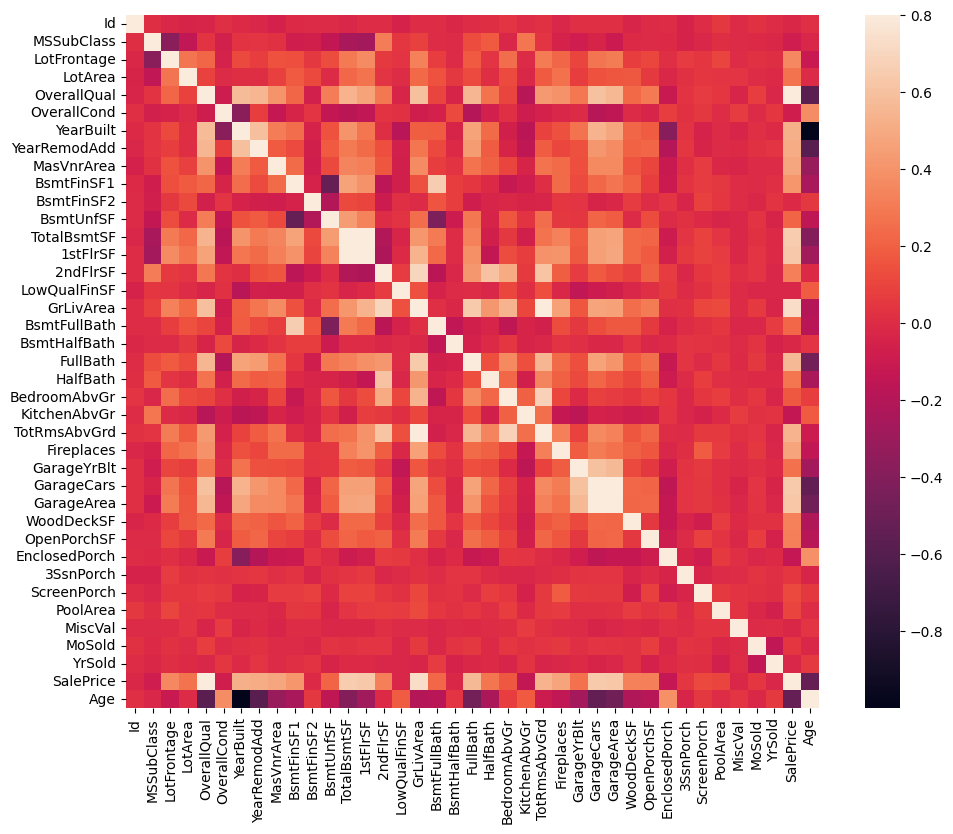

In [ ]:
num=train.select_dtypes(exclude='object').columns
corrmat = train[num].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

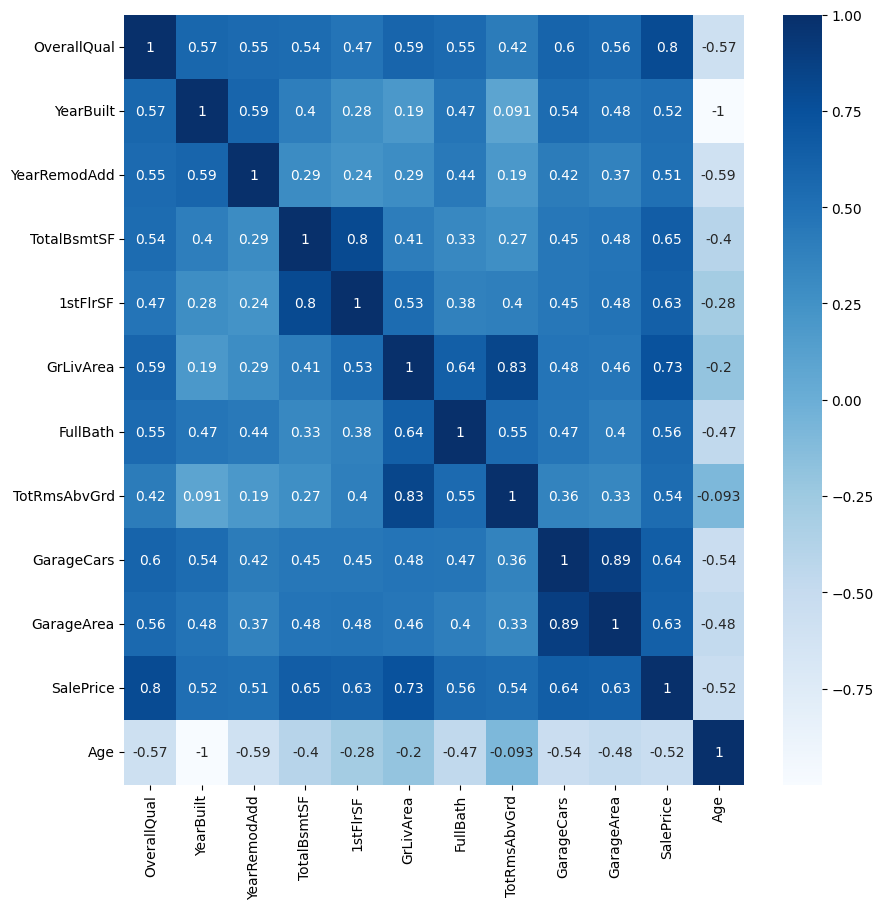

In [ ]:
corr = train[num].corr()
important_num_cols = list(train[num].corr()["SalePrice"][(train[num].corr()["SalePrice"]>0.50) | (train[num].corr()["SalePrice"]<-0.50)].index)
plt.figure(figsize=(10,10))
g = sns.heatmap(train[important_num_cols].corr(),annot=True,cmap="Blues")

In [ ]:
num_strong=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'Age']
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

importance_cols=num_strong+catg_strong_corr

In [ ]:
importance_cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'Age',
 'MSZoning',
 'Neighborhood',
 'Condition2',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'SaleType']

In [ ]:
# Menentukan kolom-kolom yang ingin digunakan


# Memilih kolom-kolom tersebut dari data train dan test
train = train[importance_cols]
#

# # Menampilkan data train dan test yang telah dipilih kolomnya
# print("Data Train:")
# print(train)
# print("\nData Test:")
# print(test)


In [ ]:
train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,Age,MSZoning,Neighborhood,Condition2,MasVnrType,ExterQual,BsmtQual,CentralAir,Electrical,KitchenQual,SaleType
0,208500,7,1710,2,856,2,5,RL,CollgCr,Norm,BrkFace,Gd,Gd,Y,SBrkr,Gd,WD
1,181500,6,1262,2,1262,2,31,RL,Veenker,Norm,None,TA,Gd,Y,SBrkr,TA,WD
2,223500,7,1786,2,920,2,7,RL,CollgCr,Norm,BrkFace,Gd,Gd,Y,SBrkr,Gd,WD
3,140000,7,1717,3,756,1,91,RL,Crawfor,Norm,None,TA,TA,Y,SBrkr,Gd,WD
4,250000,8,2198,3,1145,2,8,RL,NoRidge,Norm,BrkFace,Gd,Gd,Y,SBrkr,Gd,WD


In [ ]:
test['Age']=test['YrSold']-test['YearBuilt']

In [ ]:
yaa=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'Age','MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
test=test[yaa]

In [ ]:
test.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,Age,MSZoning,Neighborhood,Condition2,MasVnrType,ExterQual,BsmtQual,CentralAir,Electrical,KitchenQual,SaleType
0,5,896,1.0,882.0,1,49,RH,NAmes,Norm,None,TA,TA,Y,SBrkr,TA,WD
1,6,1329,1.0,1329.0,1,52,RL,NAmes,Norm,BrkFace,TA,TA,Y,SBrkr,Gd,WD
2,5,1629,2.0,928.0,2,13,RL,Gilbert,Norm,None,TA,Gd,Y,SBrkr,TA,WD
3,6,1604,2.0,926.0,2,12,RL,Gilbert,Norm,BrkFace,TA,TA,Y,SBrkr,Gd,WD
4,8,1280,2.0,1280.0,2,18,RL,StoneBr,Norm,None,Gd,Gd,Y,SBrkr,Gd,WD


In [ ]:
train.shape

(1458, 17)

In [ ]:
test.shape

(1459, 16)

In [ ]:
train.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,Age
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,180932.919067,6.093964,1510.465706,1.766118,1052.537037,1.563786,36.598080
std,79495.055285,1.376369,507.878508,0.747104,414.982320,0.549891,30.240565
min,34900.000000,1.000000,334.000000,0.000000,0.000000,0.000000,0.000000
25%,129925.000000,5.000000,1128.500000,1.000000,795.250000,1.000000,8.000000
50%,163000.000000,6.000000,1461.500000,2.000000,991.000000,2.000000,35.000000
75%,214000.000000,7.000000,1776.000000,2.000000,1296.750000,2.000000,54.000000
max,755000.000000,10.000000,4476.000000,4.000000,3206.000000,3.000000,136.000000


In [ ]:
cat=train.select_dtypes(include='object').columns

In [ ]:
train[cat].describe()

,MSZoning,Neighborhood,Condition2,MasVnrType,ExterQual,BsmtQual,CentralAir,Electrical,KitchenQual,SaleType
count,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458
unique,5,25,8,4,4,5,2,6,4,9
top,RL,NAmes,Norm,None,TA,TA,Y,SBrkr,TA,WD
freq,1149,225,1444,872,906,649,1363,1332,735,1267


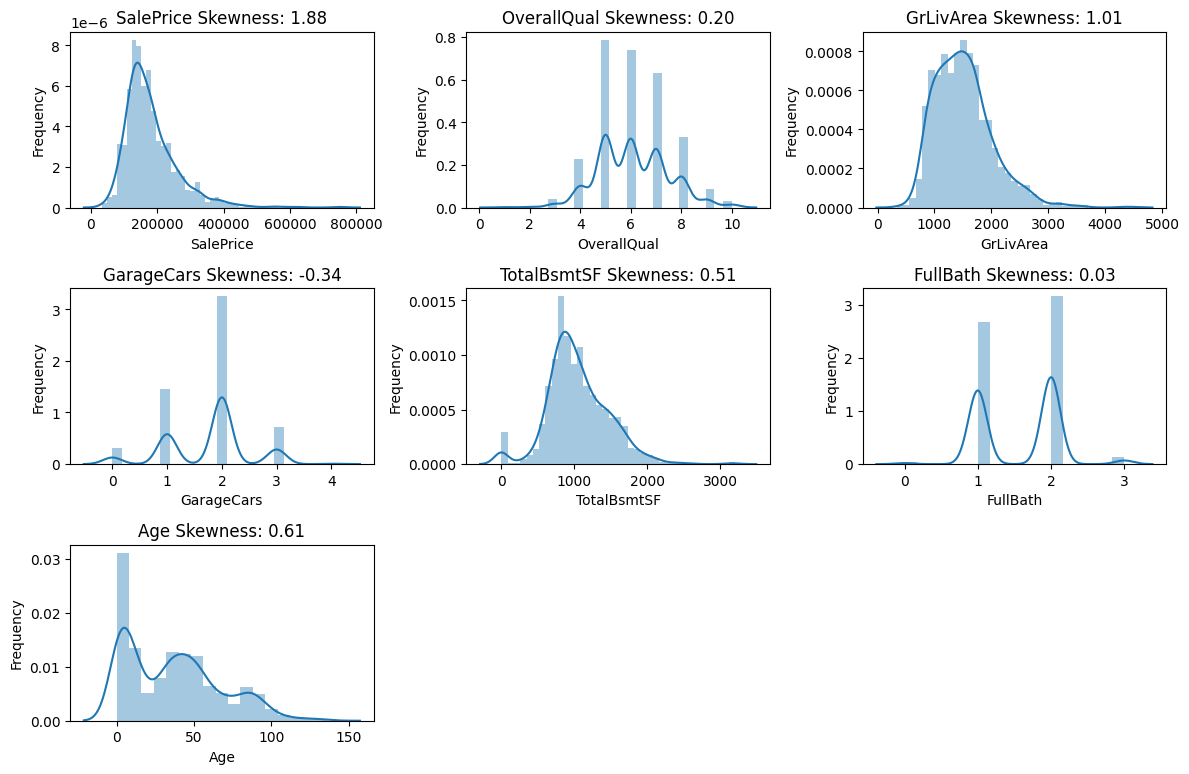

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_strong, 1):
    plt.subplot(3, 3, i)
    sns.distplot(train[feature], kde=True)
    plt.title(f"{feature} Skewness: {train[feature].skew():.2f}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
ccy=['SalePrice','GrLivArea','TotalBsmtSF']

In [ ]:

for feature in ccy:
    train[feature + '_log'] = np.log1p(train[feature])

# Hapus kolom yang sudah tidak digunakan
train = train.drop(ccy, axis=1)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OverallQual      1458 non-null   int64  
 1   GarageCars       1458 non-null   int64  
 2   FullBath         1458 non-null   int64  
 3   Age              1458 non-null   int64  
 4   MSZoning         1458 non-null   object 
 5   Neighborhood     1458 non-null   object 
 6   Condition2       1458 non-null   object 
 7   MasVnrType       1458 non-null   object 
 8   ExterQual        1458 non-null   object 
 9   BsmtQual         1458 non-null   object 
 10  CentralAir       1458 non-null   object 
 11  Electrical       1458 non-null   object 
 12  KitchenQual      1458 non-null   object 
 13  SaleType         1458 non-null   object 
 14  SalePrice_log    1458 non-null   float64
 15  GrLivArea_log    1458 non-null   float64
 16  TotalBsmtSF_log  1458 non-null   float64
dtypes: float64(3), int6

In [ ]:
jhon=['GrLivArea','TotalBsmtSF']
import numpy as np

for feature in jhon:
    test[feature + '_log'] = np.log1p(test[feature])

# Hapus kolom yang sudah tidak digunakan
test = test.drop(jhon, axis=1)


In [ ]:
#train.drop(['SalePrice', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

In [ ]:
#test.drop([ 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

In [ ]:
num=train.select_dtypes(exclude='object').columns

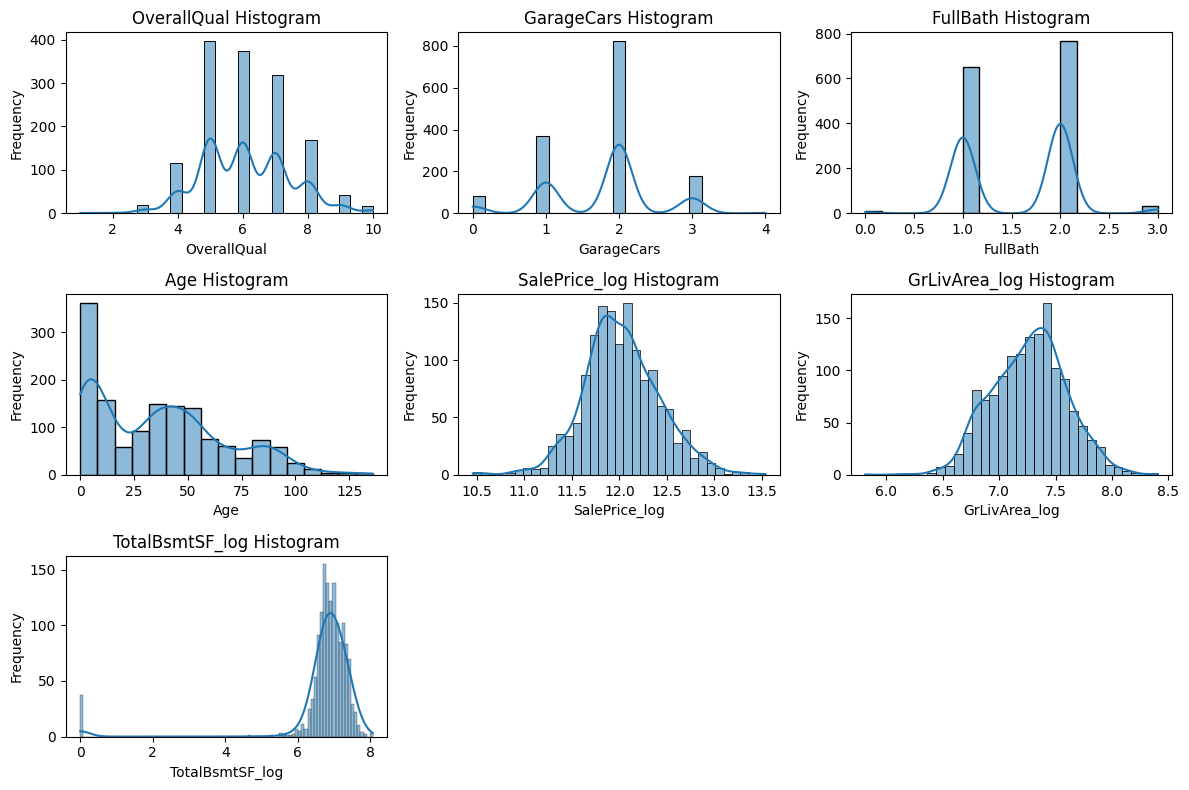

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train[feature], kde=True)
    plt.title(f"{feature} Histogram")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
train.head()

,OverallQual,GarageCars,FullBath,Age,MSZoning,Neighborhood,Condition2,MasVnrType,ExterQual,BsmtQual,CentralAir,Electrical,KitchenQual,SaleType,SalePrice_log,GrLivArea_log,TotalBsmtSF_log
0,7,2,2,5,RL,CollgCr,Norm,BrkFace,Gd,Gd,Y,SBrkr,Gd,WD,12.247699,7.444833,6.753438
1,6,2,2,31,RL,Veenker,Norm,None,TA,Gd,Y,SBrkr,TA,WD,12.109016,7.141245,7.141245
2,7,2,2,7,RL,CollgCr,Norm,BrkFace,Gd,Gd,Y,SBrkr,Gd,WD,12.317171,7.488294,6.825460
3,7,3,1,91,RL,Crawfor,Norm,None,TA,TA,Y,SBrkr,Gd,WD,11.849405,7.448916,6.629363
4,8,3,2,8,RL,NoRidge,Norm,BrkFace,Gd,Gd,Y,SBrkr,Gd,WD,12.429220,7.695758,7.044033


In [ ]:
test.head()

,OverallQual,GarageCars,FullBath,Age,MSZoning,Neighborhood,Condition2,MasVnrType,ExterQual,BsmtQual,CentralAir,Electrical,KitchenQual,SaleType,GrLivArea_log,TotalBsmtSF_log
0,5,1.0,1,49,RH,NAmes,Norm,None,TA,TA,Y,SBrkr,TA,WD,6.799056,6.783325
1,6,1.0,1,52,RL,NAmes,Norm,BrkFace,TA,TA,Y,SBrkr,Gd,WD,7.192934,7.192934
2,5,2.0,2,13,RL,Gilbert,Norm,None,TA,Gd,Y,SBrkr,TA,WD,7.396335,6.834109
3,6,2.0,2,12,RL,Gilbert,Norm,BrkFace,TA,TA,Y,SBrkr,Gd,WD,7.380879,6.831954
4,8,2.0,2,18,RL,StoneBr,Norm,None,Gd,Gd,Y,SBrkr,Gd,WD,7.155396,7.155396


### cat -> num

convert feature categorical menjadi numerical


thanks to : https://www.kaggle.com/code/dejavu23/house-prices-eda-to-ml-beginner
for such amazing idea

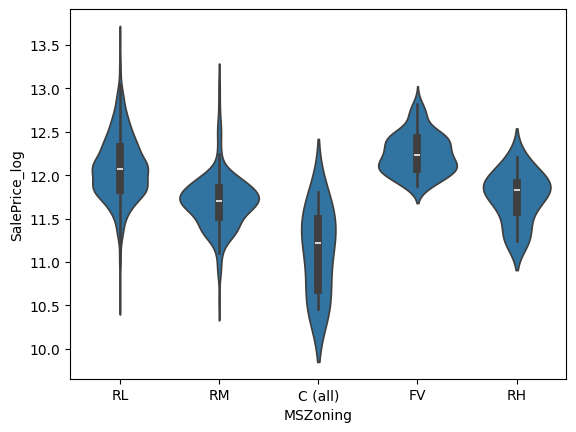

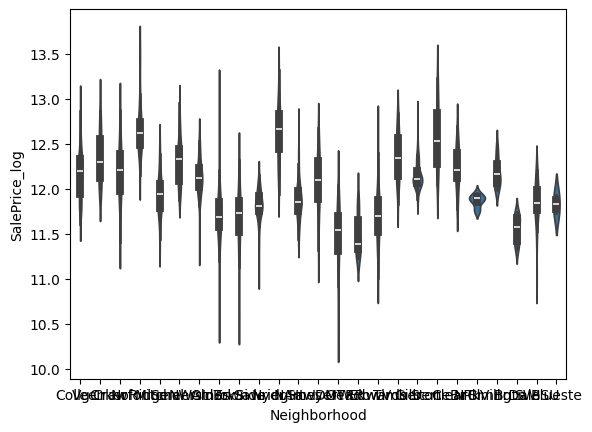

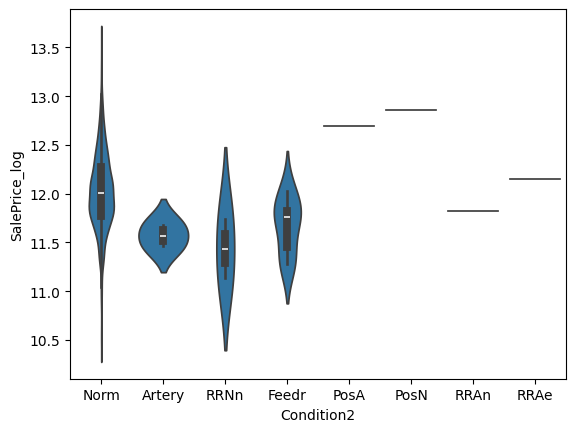

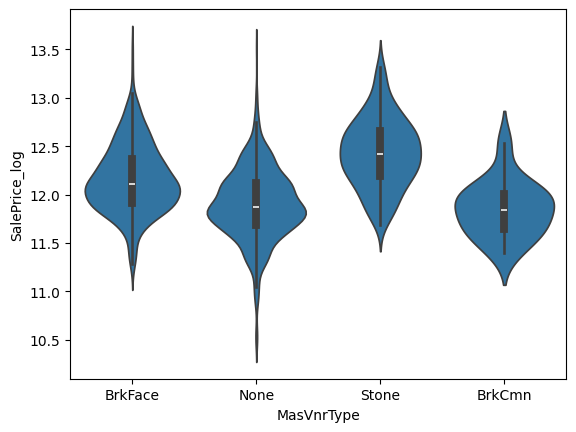

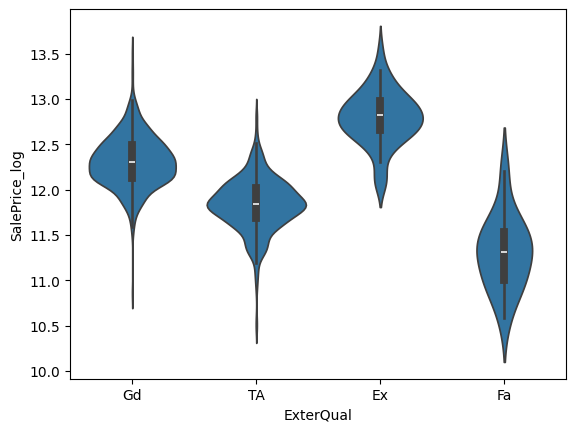

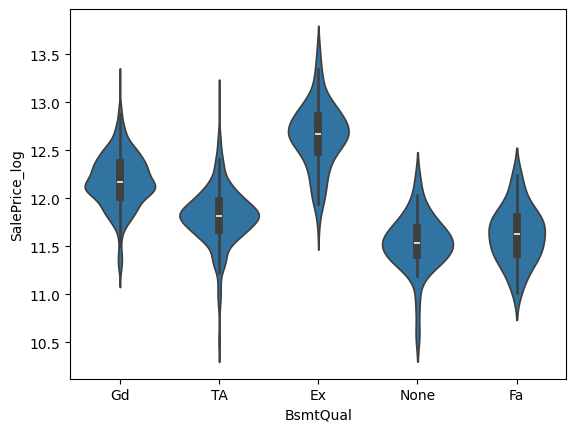

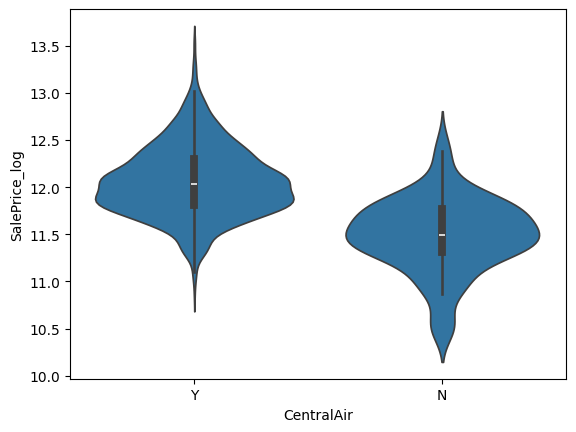

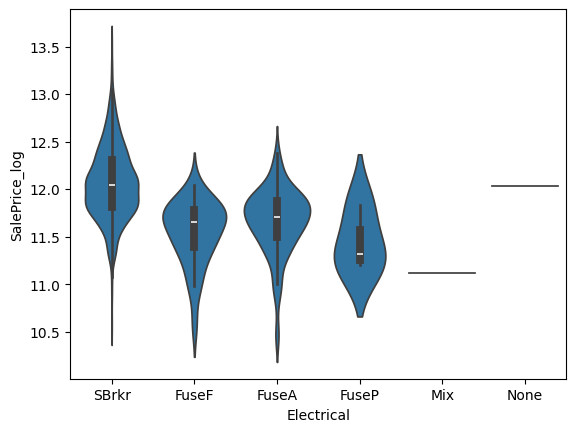

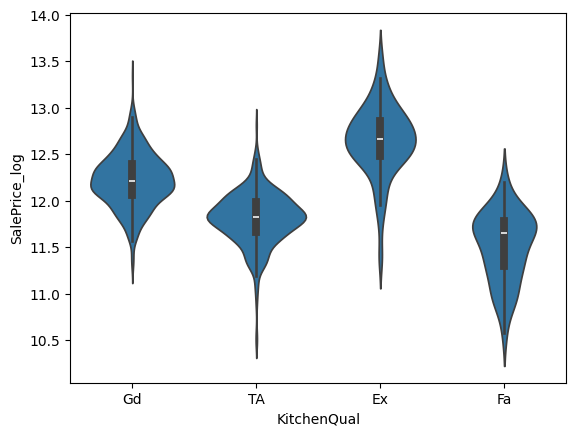

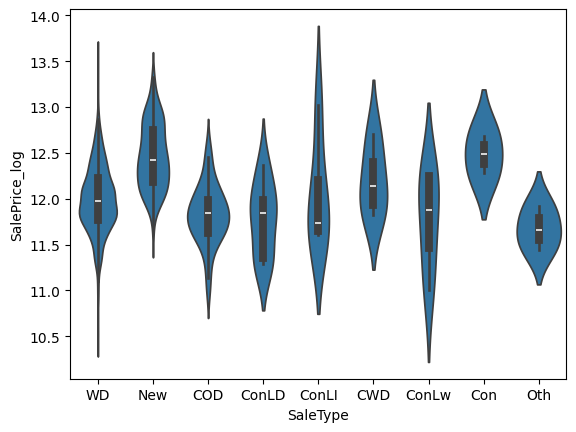

In [ ]:


for catg in cat :
    #sns.catplot(x=catg, y=target, data=df_train, kind='boxen')
    sns.violinplot(x=catg, y='SalePrice_log', data=train)
    plt.show()

In [ ]:
for catg in cat :
    g = train.groupby(catg)['SalePrice_log'].mean()
    print(g)

MSZoning
C (all)    11.118275
FV         12.246621
RH         11.749848
RL         12.085945
RM         11.692901
Name: SalePrice_log, dtype: float64
Neighborhood
Blmngtn    12.169421
Blueste    11.826543
BrDale     11.547874
BrkSide    11.679736
ClearCr    12.239905
CollgCr    12.163647
Crawfor    12.206664
Edwards    11.705330
Gilbert    12.155809
IDOTRR     11.446901
MeadowV    11.474533
Mitchel    11.933954
NAmes      11.868052
NPkVill    11.866484
NWAmes     12.130614
NoRidge    12.676003
NridgHt    12.619415
OldTown    11.703873
SWISU      11.838442
Sawyer     11.811475
SawyerW    12.090695
Somerst    12.296500
StoneBr    12.585490
Timber     12.363460
Veenker    12.344180
Name: SalePrice_log, dtype: float64
Condition2
Artery    11.570046
Feedr     11.670639
Norm      12.025931
PosA      12.691584
PosN      12.861001
RRAe      12.154785
RRAn      11.827050
RRNn      11.435340
Name: SalePrice_log, dtype: float64
MasVnrType
BrkCmn     11.853246
BrkFace    12.163635
None       11.89

In [ ]:
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV']


# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN']

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']

In [ ]:
for df in [train, test]:

    df['MSZ_num'] = 1
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3

    df['NbHd_num'] = 1
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3

    df['Cond2_num'] = 1
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3

    df['Mas_num'] = 1
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2

    df['ExtQ_num'] = 1
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4

    df['BsQ_num'] = 1
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3

    df['CA_num'] = 0
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1

    df['Elc_num'] = 1
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2


    df['KiQ_num'] = 1
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4

    df['SlTy_num'] = 2
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4

In [ ]:
target='SalePrice_log'

In [ ]:
from scipy import stats

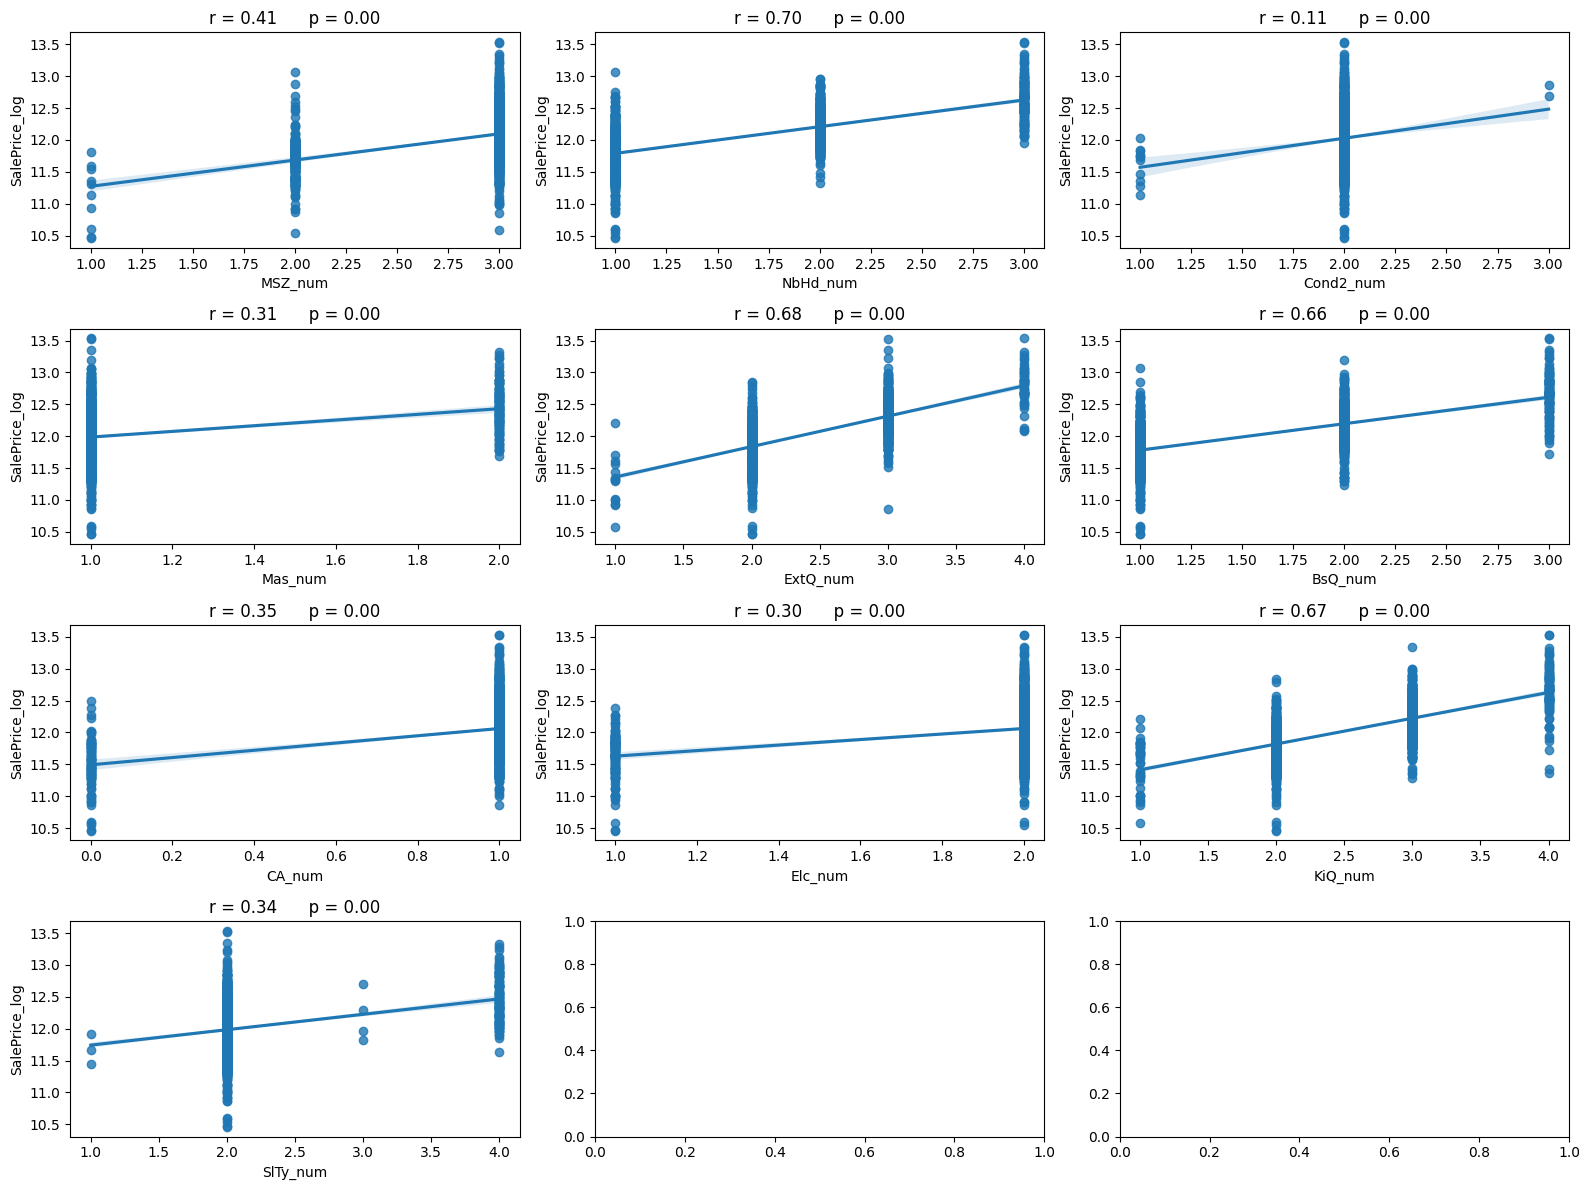

In [ ]:
new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

nr_rows = 4
nr_cols = 3
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(16, 12))

for r in range(nr_rows):
    for c in range(nr_cols):
        i = r * nr_cols + c
        if i < len(new_col_num):
            sns.regplot(x=train[new_col_num[i]], y=train[target], ax=axs[r][c])
            stp = stats.pearsonr(train[new_col_num[i]], train[target])
            str_title = f"r = {stp[0]:.2f}      p = {stp[1]:.2f}"
            axs[r][c].set_title(str_title)

plt.tight_layout()
plt.show()

In [ ]:
catg_cols_to_drop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']


for df in [train, test] :
    df.drop(catg_cols_to_drop, inplace= True, axis = 1)

In [ ]:
train.head()

,OverallQual,GarageCars,FullBath,Age,MSZoning,SalePrice_normalized,GrLivArea_normalized,TotalBsmtSF_normalized,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
0,7,2,2,5,RL,7.923841,9.751193,279.089415,3,2,2,1,3,2,1,2,3,2
1,6,2,2,31,RL,7.869635,9.247175,381.336746,3,2,2,1,2,2,1,2,2,2
2,7,2,2,7,RL,7.950777,9.824220,295.755391,3,2,2,1,3,2,1,2,3,2
3,7,3,1,91,RL,7.766591,9.758044,252.541947,3,2,2,1,2,1,1,2,3,2
4,8,3,2,8,RL,7.993920,10.175883,352.647716,3,3,2,1,3,2,1,2,3,2


In [ ]:
test.drop(['MSZoning'], axis=1, inplace=True)

In [ ]:
train.drop(['MSZoning'], axis=1, inplace=True)

In [ ]:
train.head()

,OverallQual,GarageCars,FullBath,Age,SalePrice_log,GrLivArea_log,TotalBsmtSF_log,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
0,7,2,2,5,12.247699,7.444833,6.753438,3,2,2,1,3,2,1,2,3,2
1,6,2,2,31,12.109016,7.141245,7.141245,3,2,2,1,2,2,1,2,2,2
2,7,2,2,7,12.317171,7.488294,6.825460,3,2,2,1,3,2,1,2,3,2
3,7,3,1,91,11.849405,7.448916,6.629363,3,2,2,1,2,1,1,2,3,2
4,8,3,2,8,12.429220,7.695758,7.044033,3,3,2,1,3,2,1,2,3,2


In [ ]:
test.head()

,OverallQual,GarageCars,FullBath,Age,GrLivArea_log,TotalBsmtSF_log,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
0,5,1.0,1,49,6.799056,6.783325,2,1,2,1,2,1,1,2,2,2
1,6,1.0,1,52,7.192934,7.192934,3,1,2,1,2,1,1,2,3,2
2,5,2.0,2,13,7.396335,6.834109,3,2,2,1,2,2,1,2,2,2
3,6,2.0,2,12,7.380879,6.831954,3,2,2,1,2,1,1,2,3,2
4,8,2.0,2,18,7.155396,7.155396,3,3,2,1,3,2,1,2,3,2


In [ ]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [ ]:
train_sc=train.copy()
test_sc=test.copy()

In [ ]:
train_sc.head()

,OverallQual,GarageCars,FullBath,Age,SalePrice_log,GrLivArea_log,TotalBsmtSF_log,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
0,7,2,2,5,12.247699,7.444833,6.753438,3,2,2,1,3,2,1,2,3,2
1,6,2,2,31,12.109016,7.141245,7.141245,3,2,2,1,2,2,1,2,2,2
2,7,2,2,7,12.317171,7.488294,6.825460,3,2,2,1,3,2,1,2,3,2
3,7,3,1,91,11.849405,7.448916,6.629363,3,2,2,1,2,1,1,2,3,2
4,8,3,2,8,12.429220,7.695758,7.044033,3,3,2,1,3,2,1,2,3,2


In [ ]:
from sklearn.preprocessing import StandardScaler
features_to_scale = ['OverallQual', 'GarageCars', 'FullBath', 'Age', 'MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

scaler = StandardScaler()
train_sc[features_to_scale] = scaler.fit_transform(train_sc[features_to_scale])

# Split data into features and target
X = train_sc.drop(columns=['SalePrice_log'])
y = train_sc['SalePrice_log']

In [ ]:
X.head()

,OverallQual,GarageCars,FullBath,Age,GrLivArea_log,TotalBsmtSF_log,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
0,0.658506,0.313159,0.793546,-1.045249,7.444833,6.753438,0.438861,0.658963,0.065512,-0.307562,1.061109,0.648281,0.264006,0.307562,0.741127,-0.30119
1,-0.068293,0.313159,0.793546,-0.185182,7.141245,7.141245,0.438861,0.658963,0.065512,-0.307562,-0.689001,0.648281,0.264006,0.307562,-0.770150,-0.30119
2,0.658506,0.313159,0.793546,-0.979090,7.488294,6.825460,0.438861,0.658963,0.065512,-0.307562,1.061109,0.648281,0.264006,0.307562,0.741127,-0.30119
3,0.658506,1.652119,-1.025620,1.799589,7.448916,6.629363,0.438861,0.658963,0.065512,-0.307562,-0.689001,-0.921808,0.264006,0.307562,0.741127,-0.30119
4,1.385305,1.652119,0.793546,-0.946011,7.695758,7.044033,0.438861,2.162512,0.065512,-0.307562,1.061109,0.648281,0.264006,0.307562,0.741127,-0.30119


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_test.head()

1322    12.154785
837     11.512935
413     11.652696
522     11.976666
1036    12.661917
Name: SalePrice_log, dtype: float64

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
# Inisialisasi model-model yang akan digunakan
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1, random_state=42),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Melatih model dan menyimpan hasilnya
results = []

for name, model in models.items():
    # Melatih model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Menghitung metrik evaluasi untuk data latih dan uji
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Cross-validation R²
    r2_cv_train = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2'))
    r2_cv_test = np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2'))

    results.append({
        "Model": name,
        "RMSE (train)": rmse_train,
        "RMSE (test)": rmse_test,
        "MAPE (train)": mape_train,
        "MAPE (test)": mape_test,
        "R² (train)": r2_train,
        "R² (test)": r2_test,
        "R² (cross-val train)": r2_cv_train,
        "R² (cross-val test)": r2_cv_test
    })


In [ ]:
# Mengubah hasil menjadi DataFrame
results_df = pd.DataFrame(results)

# Menampilkan hasil
display(results_df)

,Model,RMSE (train),RMSE (test),MAPE (train),MAPE (test),R² (train),R² (test),R² (cross-val train),R² (cross-val test)
0,Linear Regression,0.144008,0.149676,0.009037,0.009492,0.868266,0.867106,0.859513,0.850948
1,Lasso,0.228262,0.237439,0.013976,0.014911,0.669027,0.665567,0.660097,0.691409
2,Elastic Net,0.192838,0.201711,0.011748,0.012546,0.763783,0.758641,0.752605,0.768952
3,Random Forest,0.056746,0.149510,0.003316,0.008753,0.979545,0.867400,0.852572,0.816500
4,Decision Tree,0.004334,0.198539,0.000039,0.011851,0.999881,0.766173,0.702223,0.643833
5,Gradient Boosting,0.107276,0.137668,0.006610,0.008277,0.926898,0.887573,0.869635,0.822750
6,Support Vector Regression,0.132713,0.149619,0.008142,0.009111,0.888121,0.867207,0.862664,0.830655


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  -0.022704744491672542


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Model dengan parameter terbaik
best_model = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50)
best_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluasi performa pada data latih
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluasi performa pada data uji
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')

# Output results
print(f"RMSE (Train): {rmse_train:.4f}")
print(f"MAPE (Train): {mape_train:.4f}")
print(f"R² (Train): {r2_train:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAPE (Test): {mape_test:.4f}")
print(f"R² (Test): {r2_test:.4f}")
print(f"Cross-Validation R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


RMSE (Train): 0.0854
MAPE (Train): 0.0050
R² (Train): 0.9536
RMSE (Test): 0.1516
MAPE (Test): 0.0086
R² (Test): 0.8636
Cross-Validation R²: 0.8527 ± 0.0202


In [ ]:
y_test_pred = best_model.predict(X_test)

In [ ]:
X_test.head()

,OverallQual,GarageCars,FullBath,Age,GrLivArea_log,TotalBsmtSF_log,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
1322,0.658506,0.313159,0.793546,-0.615215,7.562162,6.621406,0.438861,2.162512,0.065512,-0.307562,1.061109,0.648281,0.264006,0.307562,0.741127,-0.30119
837,-0.068293,-1.025802,-1.025620,-0.052864,6.895683,6.182085,-2.080270,-0.844586,0.065512,-0.307562,-0.689001,-0.921808,0.264006,0.307562,-0.770150,-0.30119
413,-0.795092,0.313159,-1.025620,1.534953,6.936343,6.916715,-2.080270,-0.844586,0.065512,-0.307562,-0.689001,-0.921808,0.264006,-3.251373,-0.770150,-0.30119
522,-0.068293,0.313159,0.793546,0.741045,7.417580,6.912743,-2.080270,-0.844586,0.065512,-0.307562,-0.689001,-0.921808,0.264006,0.307562,-0.770150,-0.30119
1036,2.112103,1.652119,0.793546,-1.144488,7.390799,7.390799,0.438861,0.658963,0.065512,3.251373,1.061109,2.218370,0.264006,0.307562,2.252404,-0.30119


In [ ]:
y_test_pred

array([12.20723844, 11.42226797, 11.65401439, 11.90124367, 12.61274952,
       11.87900425, 12.21524138, 12.60294477, 12.56742711, 11.76209896,
       11.91968264, 12.19150191, 12.25152187, 12.48254738, 12.15718678,
       12.0131208 , 12.19938752, 11.8234134 , 11.78343682, 12.20008373,
       12.09714988, 12.25559891, 12.0820233 , 12.32420042, 12.1520976 ,
       12.05547598, 12.19357396, 11.6193796 , 12.11146465, 11.87674984,
       11.65868418, 11.6566401 , 12.18412906, 11.62629441, 12.44365966,
       12.63199475, 11.70485639, 12.26236664, 11.4917739 , 11.50163198,
       11.760069  , 12.35385737, 11.74334845, 11.59720342, 11.83619122,
       12.08975455, 11.80261575, 11.75655182, 11.78698439, 11.85371446,
       12.00407969, 11.5708553 , 11.64757193, 12.05464301, 11.87525223,
       12.36799438, 12.1593226 , 11.97281148, 11.92405241, 11.07693597,
       11.13200855, 12.19156292, 12.69808155, 12.48550928, 12.53010411,
       12.22485943, 11.62863971, 11.1048359 , 11.73443582, 12.06

In [ ]:
test_sc.head()

,OverallQual,GarageCars,FullBath,Age,GrLivArea_log,TotalBsmtSF_log,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
0,5,1.0,1,49,6.799056,6.783325,2,1,2,1,2,1,1,2,2,2
1,6,1.0,1,52,7.192934,7.192934,3,1,2,1,2,1,1,2,3,2
2,5,2.0,2,13,7.396335,6.834109,3,2,2,1,2,2,1,2,2,2
3,6,2.0,2,12,7.380879,6.831954,3,2,2,1,2,1,1,2,3,2
4,8,2.0,2,18,7.155396,7.155396,3,3,2,1,3,2,1,2,3,2


In [ ]:
test_prediction=best_model.predict(test_sc)


In [ ]:
test_prediction

array([12.30672558, 12.37606325, 12.50588787, ..., 12.3352093 ,
       12.27703772, 12.59905718])

In [ ]:
predicted_prices = np.exp(test_prediction)

In [ ]:
test_prediction_or=pd.DataFrame(predicted_prices,columns=['SalePrice'])

In [ ]:
test_prediction_or.head()

,SalePrice
0,221178.551780
1,237058.743593
2,269921.883170
3,240365.824595
4,264058.477953


In [ ]:
result=pd.concat([id_test,test_prediction_or],axis=1)

In [ ]:
result.head()

,Id,SalePrice
0,1461,221178.551780
1,1462,237058.743593
2,1463,269921.883170
3,1464,240365.824595
4,1465,264058.477953


we will update soon!

## reff
1. https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard
2. https://www.kaggle.com/code/adamml/how-to-be-in-top-10-for-beginner
3. https://www.kaggle.com/code/emrearslan123/house-price-prediction
4. https://www.kaggle.com/code/dejavu23/house-prices-eda-to-ml-beginner